<a href="https://colab.research.google.com/github/CeliaScript/PROYECTOS/blob/main/PII_PREDICCION_VIAJEROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO: APRENDIZAJE SUPERVISADO

Bienvenido al año 2912, donde se necesitan tus habilidades de ciencia de datos para resolver un misterio cósmico. Hemos recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

La nave espacial Alcón Milenario fue un transatlántico de pasajeros interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Alcón Milenario chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

Para ayudar a las tripulaciones de rescate y recuperar a los pasajeros perdidos, debe predecir qué pasajeros fueron transportados por la anomalía utilizando los registros recuperados del sistema informático dañado de la nave espacial.

¡Ayuda a salvarlos y cambia la historia!

#### a) Realizar un análisis exploratorio de los datos para entender la distribución de las diferentes variables.
#### b) Procesar los datos para:
##### - Detectar y tratar los posibles valores faltantes.
##### - Detectar y tratar outliers.
#### c) Utilizar técnicas para detectar las variables más importante con respecto a la variable objetivo (Transported)
#### d) Aplicar alguna técnica para determinar qué pasajeros fueron transportados y cuales no.
#### e) Mejorar los resultados optimizando los parámetros.
#### f) Comparar los resultados obtenidos utilizando modelos de ensemble para resolver el problema.
#### g) Seleccionar el mejor modelo de los testeados en los apartados anteriores.


In [ ]:
#Bibliotecas que vamos a utilizar:
import pandas as pd
import numpy as np

!pip install ydata_profiling
from ydata_profiling import ProfileReport

a) Realizar un análisis exploratorio de los datos para entender la distribución de las diferentes variables.

In [ ]:
train = pd.read_csv ('spaceship_alcon_train.csv')
test = pd.read_csv ('spaceship_alcon_test.csv')

In [ ]:
#Vemos las primeras filas de los dos dataset
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [ ]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [ ]:
#Numero de filas y columnas de nuestros dataset

In [ ]:
print('Rows and columns in training dataset : ',train.shape)

Rows and columns in training dataset :  (8693, 14)


In [ ]:
print('Rows and columns in training dataset : ',test.shape)

Rows and columns in training dataset :  (4277, 13)


In [ ]:
train.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [ ]:
test.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000

In [ ]:
#Vamos a hacer un reporte de perfilado del dataset train para hacernos una idea sobre el

In [ ]:
#Vamos a empezar con una visualizacion rapida de todo nuestro Dataset train que contiene nuestra variable target haciendo un reporte de perfilado
import pandas as pd
from ydata_profiling import ProfileReport
profile = ProfileReport(train, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Ya con esta primera visualizacion podemos sacar nuestras primeras conclusiones:

#Tenemos 11 variables de las cuales 2 son categoricas, 3 booleanas y 6 numericas
#La variable VIP esta claramente desbalanceada
#Tenemos muchas variables con un numero muy elevado de ceros
#Vemos que no existen duplicados.

In [ ]:
duplicados = train.duplicated()
print(duplicados.sum())

0


In [ ]:
duplicados = test.duplicated()
print(duplicados.sum())

0


In [ ]:
print("---------- Información en train --------------")
train.info()

---------- Información en train --------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
print("---------- Información en test ---------------")
test.info()

---------- Información en test ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
#Vamos a ver un poco las distribuciones de nuestras variables
#Vamos a hacer un "groupby" de las variables categoricas con la target de nuestro dataset train

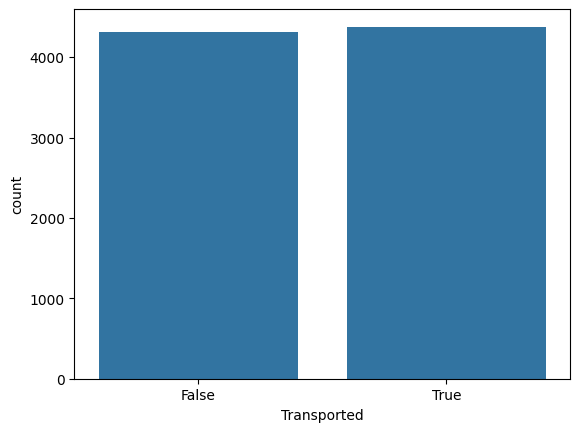

In [ ]:
#Vamos a ver primero como esta distribuida nuestra variable target
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Transported', data = train)
plt.show()

In [ ]:
frecuencias = train['Transported'].value_counts()
print(frecuencias)

Transported
True     4378
False    4315
Name: count, dtype: int64


In [ ]:
#HomePlanet vs Transported
train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

HomePlanet  Transported
1     Europa     0.658846
2       Mars     0.523024
0      Earth     0.423946

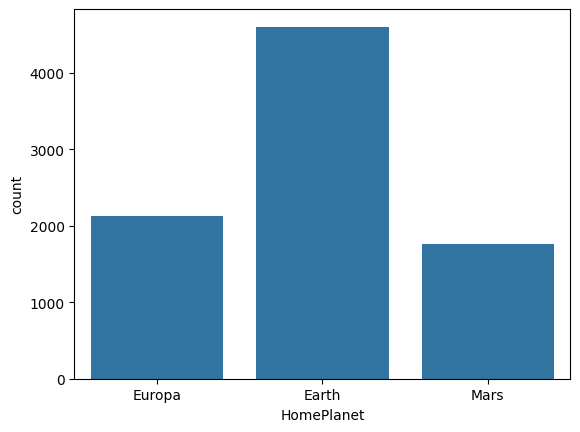

In [ ]:
sns.countplot(x='HomePlanet', data = train)
plt.show()

In [ ]:
!pip install plotly
import plotly.express as px

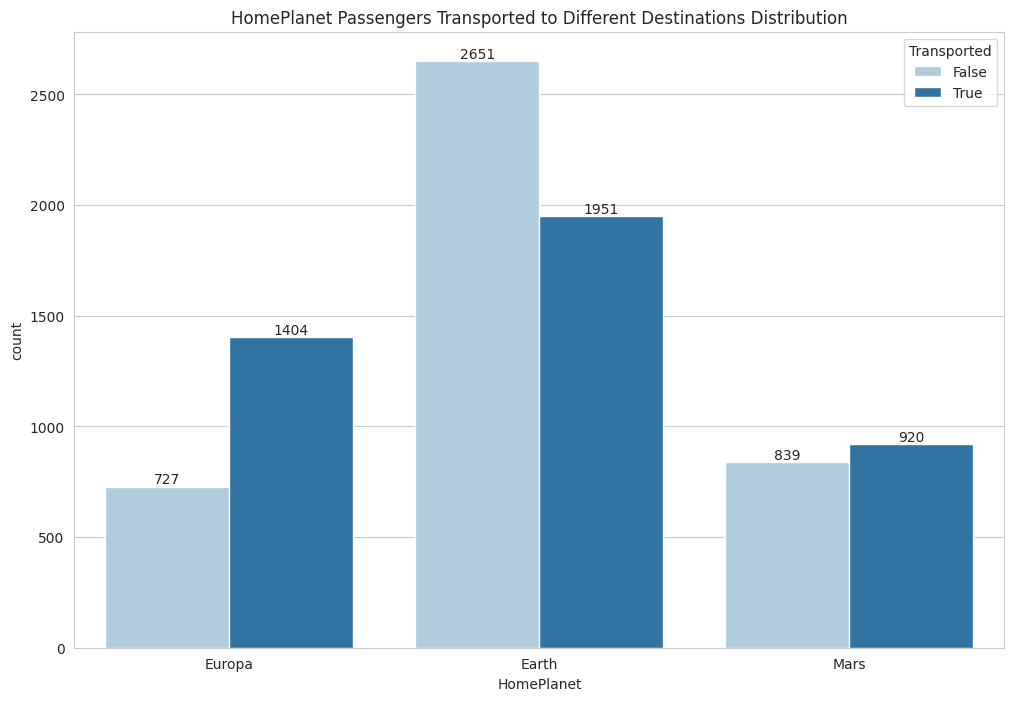

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='HomePlanet', hue='Transported', data=train, palette='Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('HomePlanet Passengers Transported to Different Destinations Distribution')
plt.show()

In [ ]:
frecuencias = train['HomePlanet'].value_counts()
print(frecuencias)

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


In [ ]:
#CryoSleep vs Transported
train [['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

CryoSleep  Transported
1      True     0.817583
0     False     0.328921

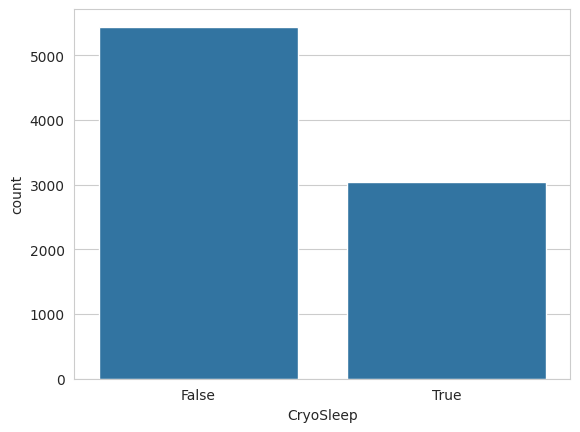

In [ ]:
sns.countplot(x='CryoSleep', data = train)
plt.show()

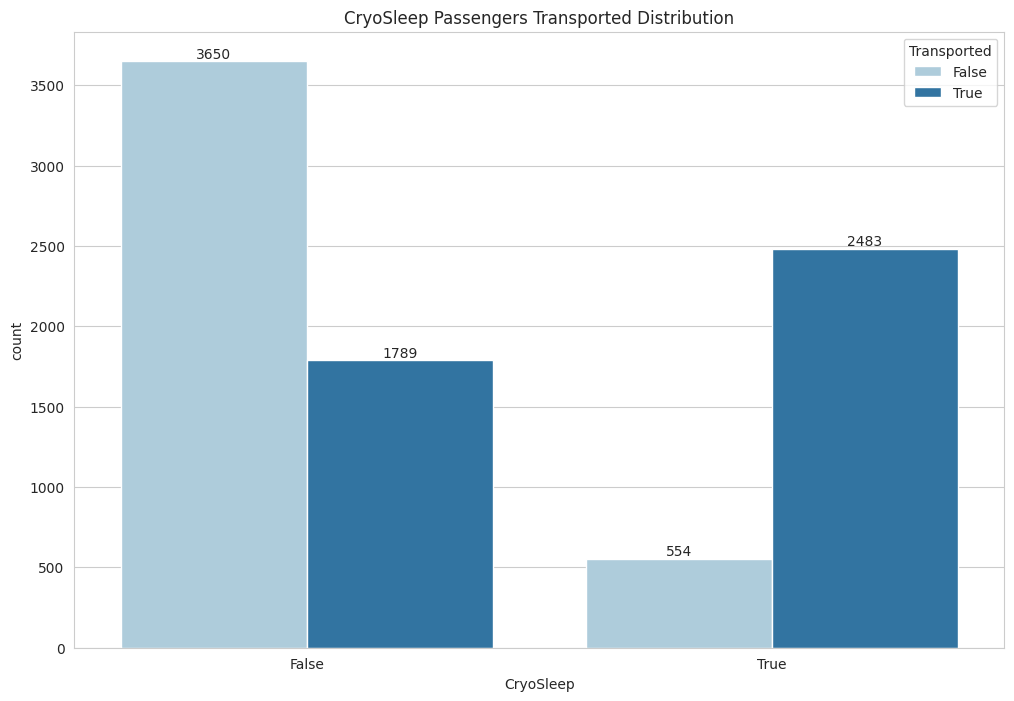

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='CryoSleep', hue='Transported', data=train, palette='Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('CryoSleep Passengers Transported Distribution')
plt.show()

In [ ]:
frecuencias = train['CryoSleep'].value_counts()
print(frecuencias)

CryoSleep
False    5439
True     3037
Name: count, dtype: int64


In [ ]:
#Destinacion vs Transported
train [['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

Destination  Transported
0    55 Cancri e     0.610000
1  PSO J318.5-22     0.503769
2    TRAPPIST-1e     0.471175

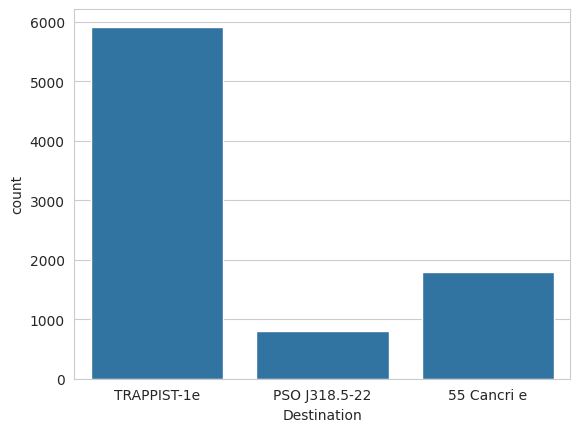

In [ ]:
sns.countplot(x='Destination', data = train)
plt.show()

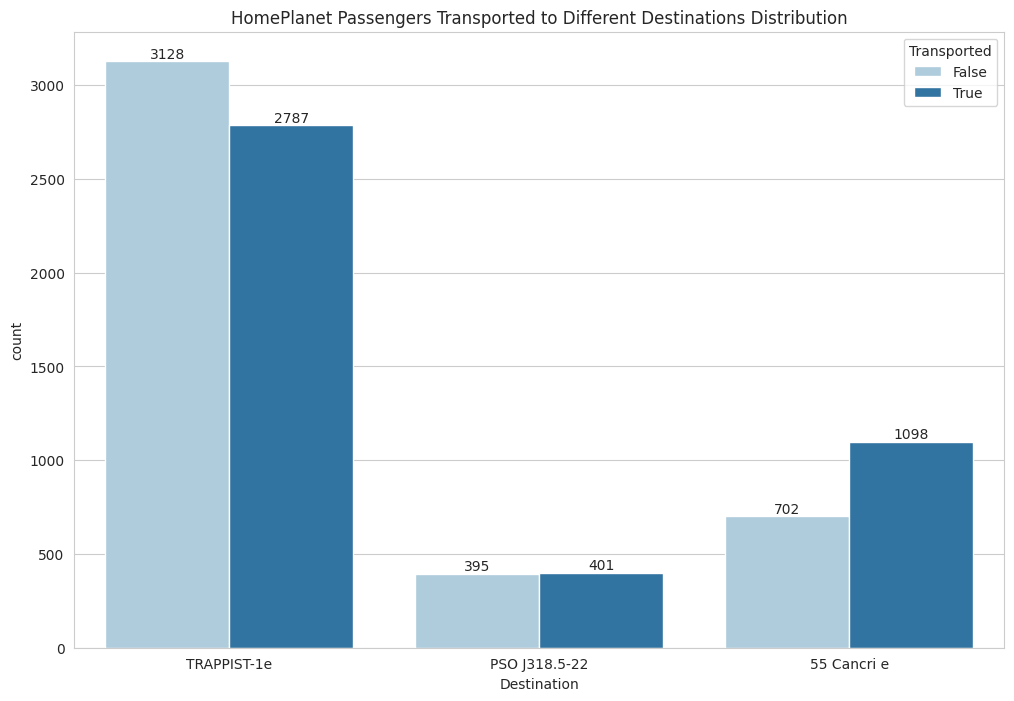

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='Destination', hue='Transported', data=train, palette='Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('HomePlanet Passengers Transported to Different Destinations Distribution')
plt.show()

In [ ]:
frecuencias = train['Destination'].value_counts()
print(frecuencias)

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


In [ ]:
#VIP vs Transported
train [['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

VIP  Transported
0  False     0.506332
1   True     0.381910

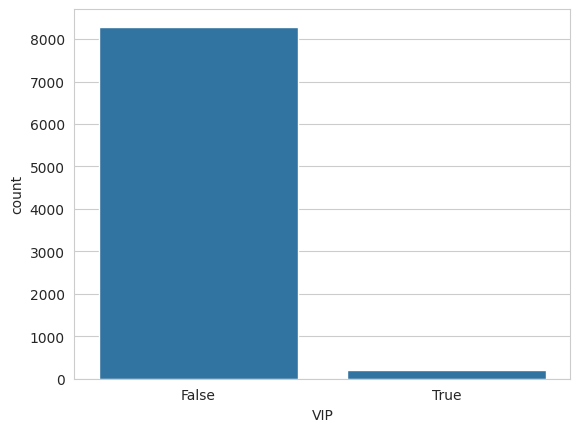

In [ ]:
#Comprobamos que efectivamente esta muy desbalanceada la variable VIP
sns.countplot(x='VIP', data = train)
plt.show()

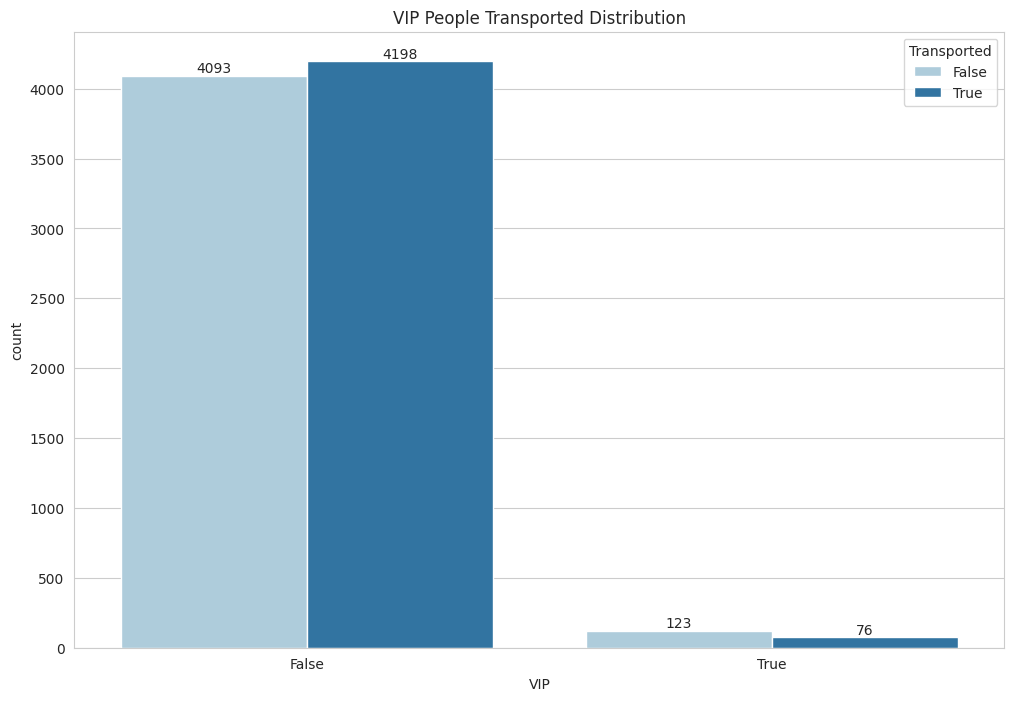

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='VIP',hue='Transported', data=train,palette='Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('VIP People Transported Distribution')
plt.show()

In [ ]:
frecuencias = train['VIP'].value_counts()
print(frecuencias)

VIP
False    8291
True      199
Name: count, dtype: int64


<ipython-input-37-dc5db385064d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transported', y='Age', data=train, palette='muted')


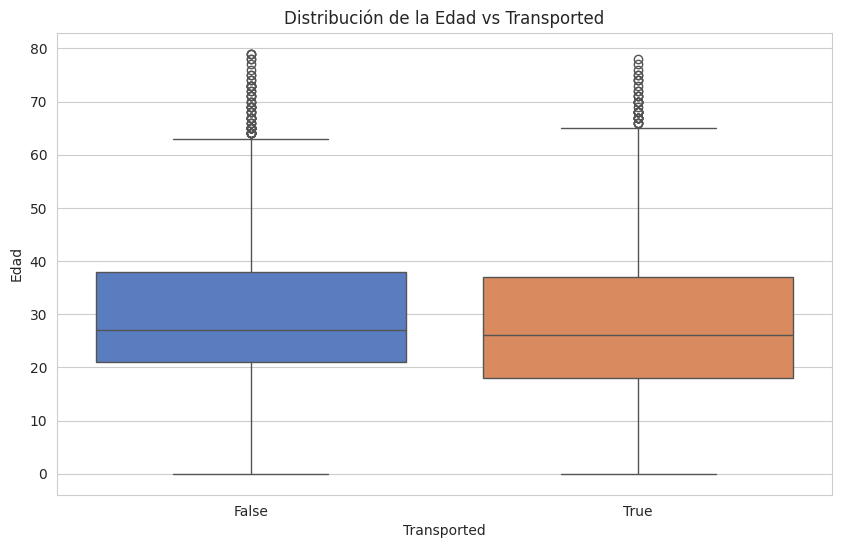

In [ ]:
#Distribucion de la variable edad vs transported a traves de grafico de caja y grafico de violin
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='Age', data=train, palette='muted')
plt.xlabel('Transported')
plt.ylabel('Edad')
plt.title('Distribución de la Edad vs Transported')
plt.show()

<ipython-input-38-34f1014d6687>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Transported', y='Age', data=train, palette='muted')


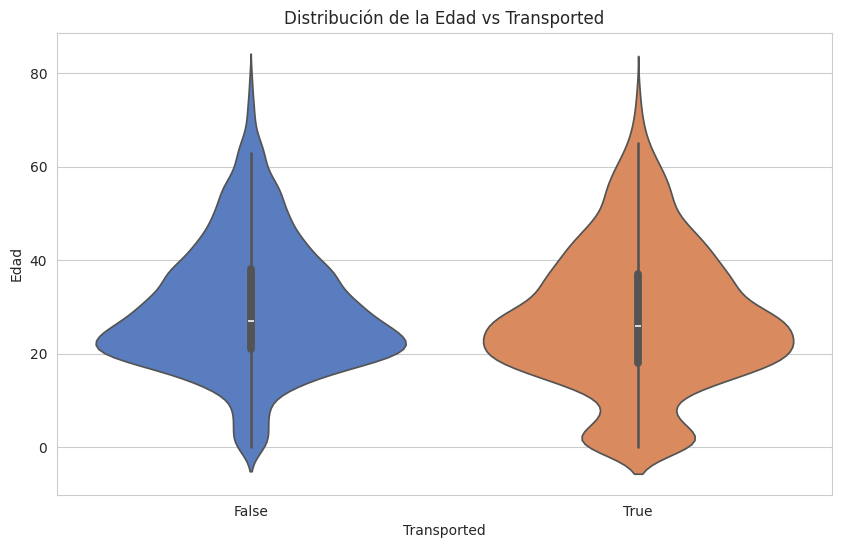

In [ ]:
#A traves de un grafico de violin
plt.figure(figsize=(10, 6))
sns.violinplot(x='Transported', y='Age', data=train, palette='muted')
plt.xlabel('Transported')
plt.ylabel('Edad')
plt.title('Distribución de la Edad vs Transported')
plt.show()

In [ ]:
#Vamos a seguir visualizando como se distribuyen las variables respecto a nuestra target
!pip install plotly
import plotly.express as px
fig = px.scatter(train,x='Age', y='RoomService', color='Transported')
fig.show()
#Aqui podemos ver la mayoria de RoomService que pagaron menos si fueron transportados

In [ ]:
fig = px.scatter(train,x='Age', y='VRDeck', color='Transported')
fig.show()
#Aqui tambien vemos lo mismo, cuanto mas bajo el coste mas teletransportados

In [ ]:
fig = px.scatter(train,x='Age', y='Spa', color='Transported')
fig.show()
#Aqui vemos tambien que los que menos gastaron en Spa mas fueron transportados

b) Procesar los datos para:
- Detectar y tratar los posibles valores faltantes.
- Detectar y tratar outliers.

In [ ]:
#Vemos los valores nulos de train y de test
print("---------- NA en train --------------")
print(train.isnull().sum())
print("---------- NA en test  ---------------")
print(test.isnull().sum())

---------- NA en train --------------
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
---------- NA en test  ---------------
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [ ]:
#Podemos rellenarlos con la moda que es el valor mas frecuente ya que se considera que
#introduce menos sesgo que haciendolo con la media o la mediana.

In [ ]:
#Rellenamos en train
train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['CryoSleep'] = train['CryoSleep'].fillna(train['CryoSleep'].mode()[0])
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0])
train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])
train['Age'] = train['Age'].fillna(train['Age'].mode()[0])
train['VIP'] = train['VIP'].fillna(train['VIP'].mode()[0])
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].mode()[0])
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].mode()[0])
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].mode()[0])
train['Spa'] = train['Spa'].fillna(train['Spa'].mode()[0])
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].mode()[0])
train['Name'] = train['Name'].fillna(train['Name'].mode()[0])

In [ ]:
#Rellenamos en test
test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['CryoSleep'] = test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
test['Cabin'] = test['Cabin'].fillna(test['Cabin'].mode()[0])
test['Destination'] = test['Destination'].fillna(test['Destination'].mode()[0])
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])
test['VIP'] = test['VIP'].fillna(test['VIP'].mode()[0])
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].mode()[0])
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].mode()[0])
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].mode()[0])
test['Spa'] = test['Spa'].fillna(test['Spa'].mode()[0])
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].mode()[0])
test['Name'] = test['Name'].fillna(test['Name'].mode()[0])

In [ ]:
#Comprobamos que no queden nulos en ninguno de los dos
print("---------- NA en train --------------")
print(train.isnull().sum())
print("---------- NA en test  ---------------")
print(test.isnull().sum())

---------- NA en train --------------
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64
---------- NA en test  ---------------
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


In [ ]:
#Con el dataset limpio podemos ver a traves de un grafico interactivo usando Plotly la distribucion de varias variables al mismo tiempo
!pip install plotly
import plotly.express as px

#Gráfico Interactivo usando Plotly
fig = px.sunburst(
    train,
    path=['HomePlanet', 'Destination', 'Transported'],
    width=800,
    height=800,
    title='Distribución de Pasajeros por HomePlanet, Destination y Transported',
    color_discrete_sequence=px.colors.cyclical.Phase
)
fig.show()

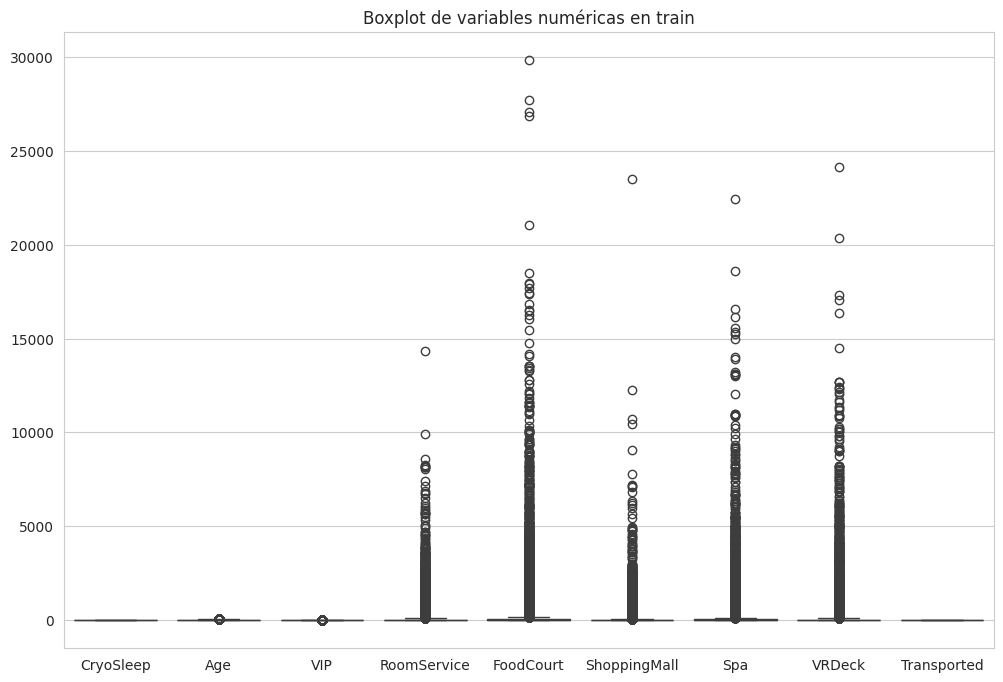

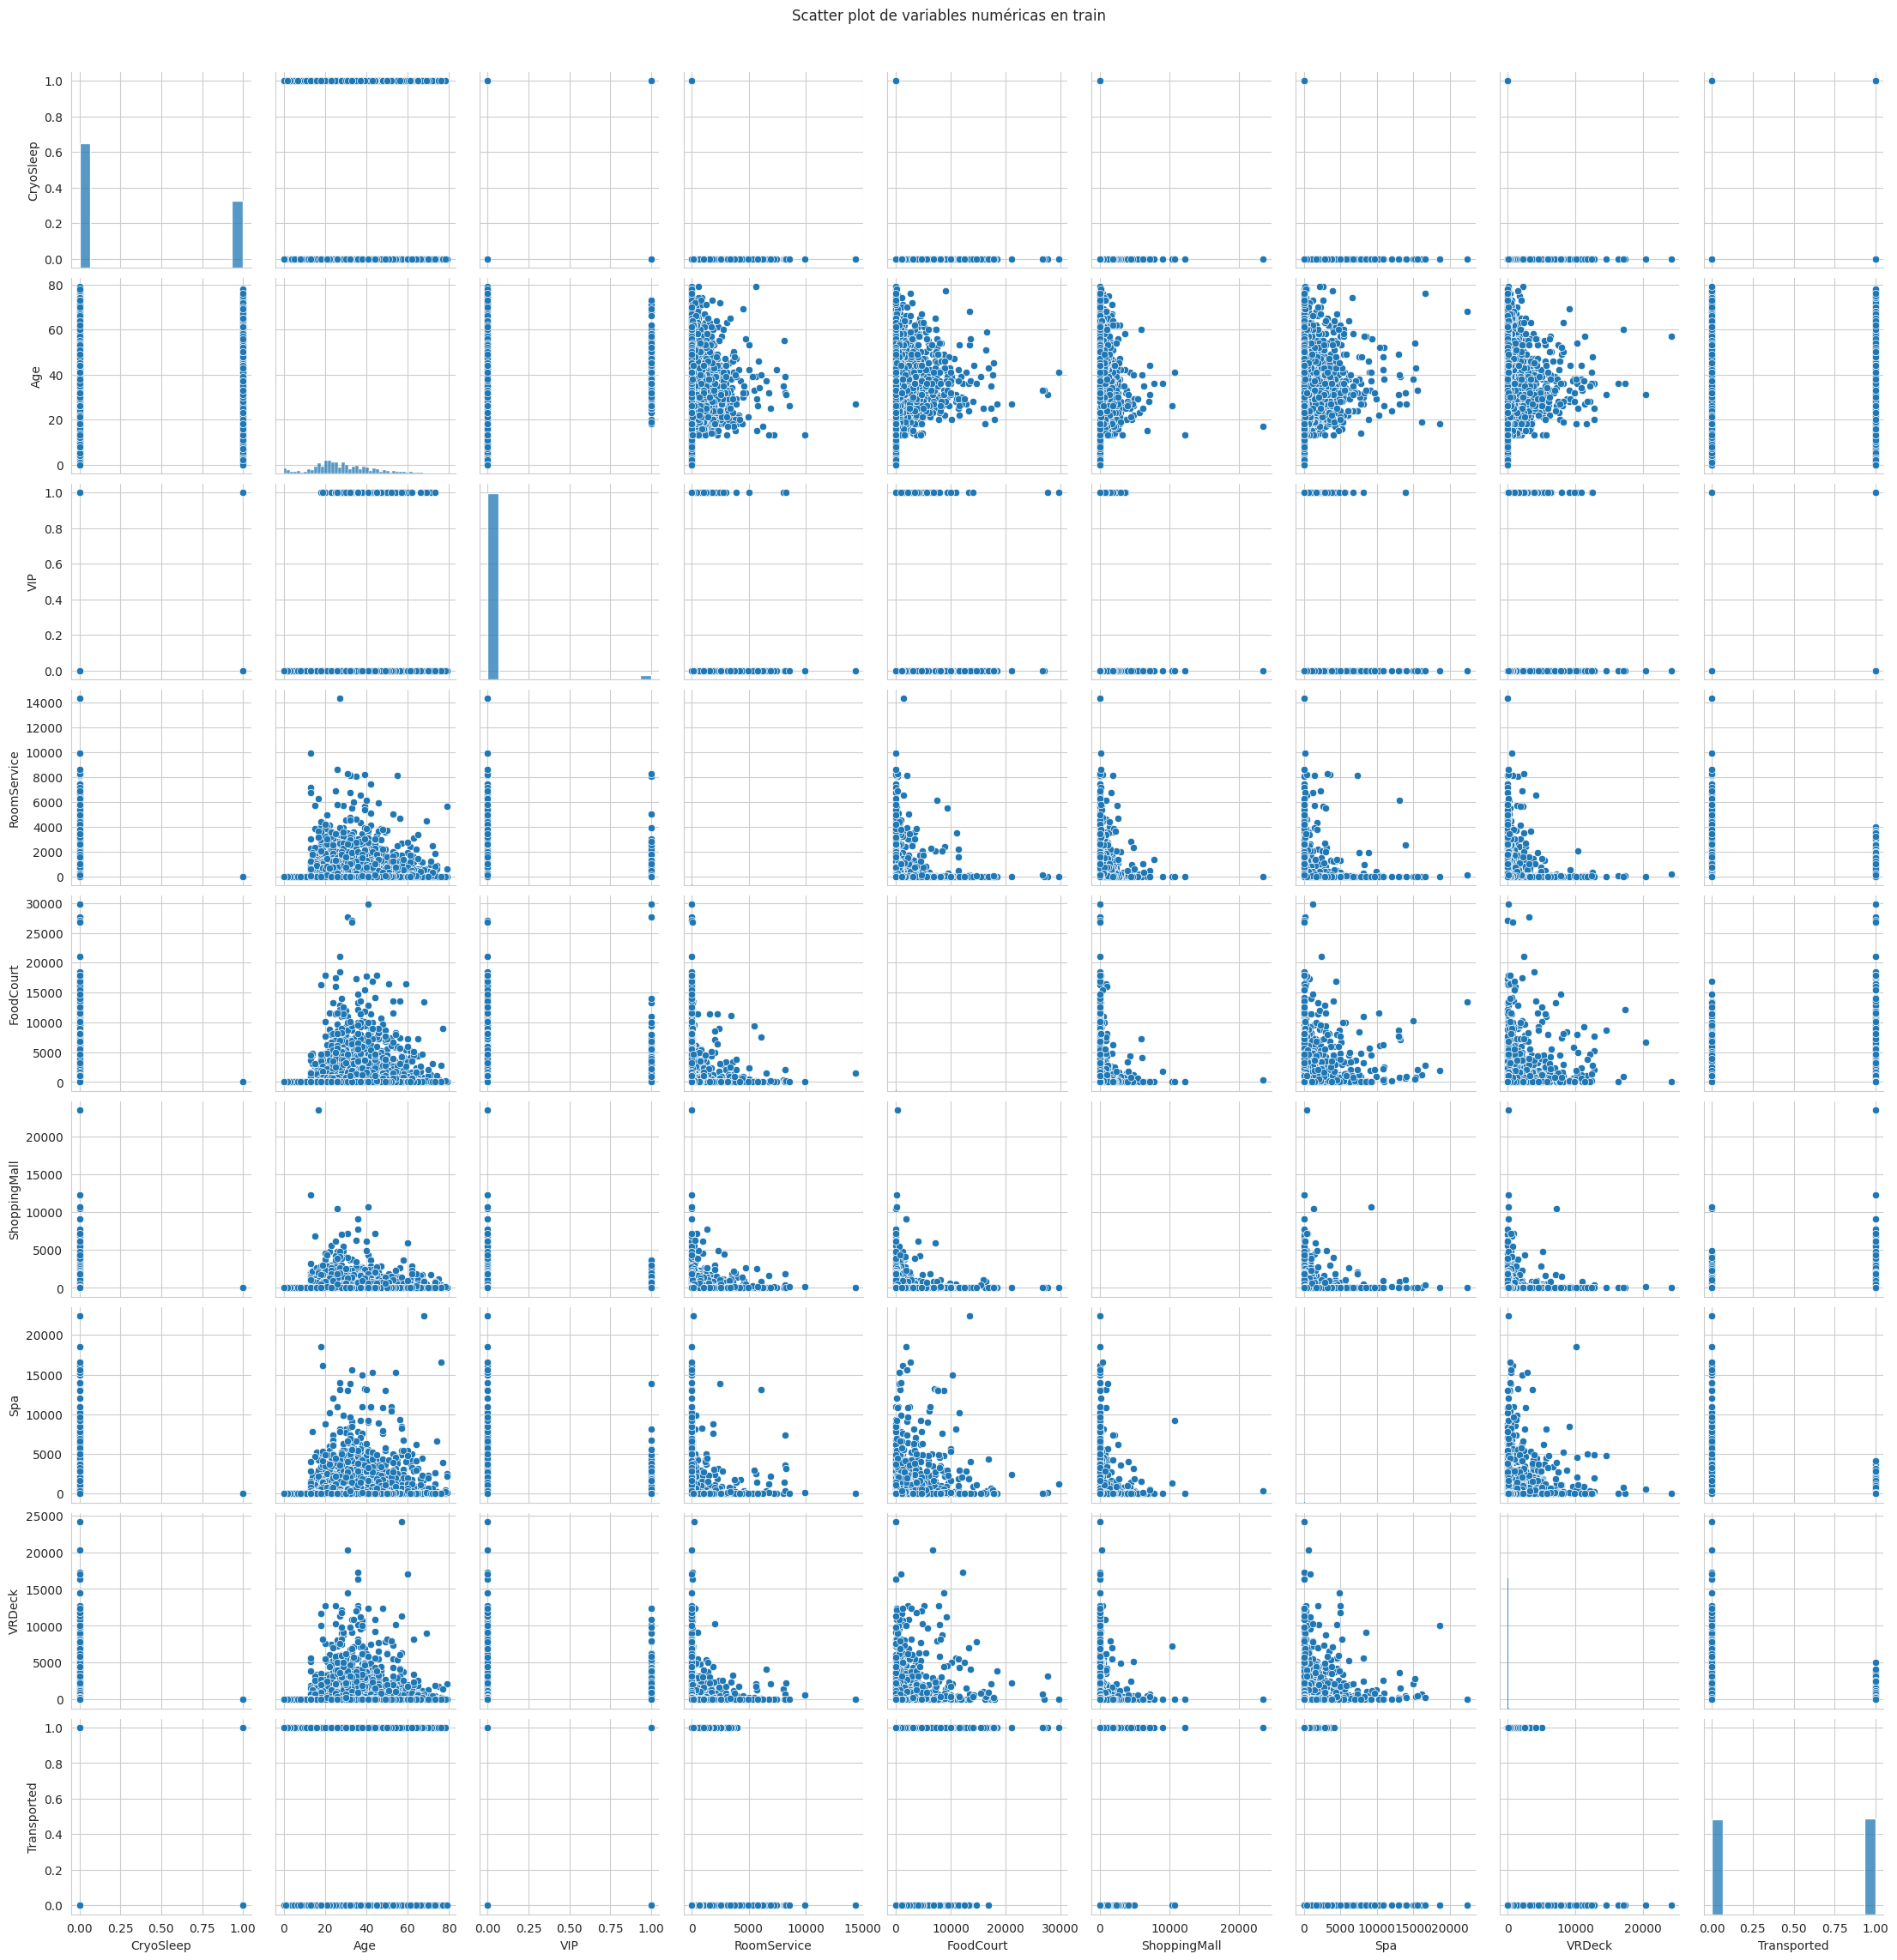

In [ ]:
#TRATAMIENTO DE OUTLIERS:
#Vamos a visualizarlos primero en train

#Boxplot de variables numéricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=train)
plt.title('Boxplot de variables numéricas en train')
plt.show()

#Scatter plot de variables numéricas
sns.pairplot(train)
plt.suptitle('Scatter plot de variables numéricas en train', y=1.02)
plt.show()

In [ ]:
#Una vez visualizado vamos a tratar los outliers con el IQR,
#El IQR es una medida de dispersión estadística, siendo la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1).
#Los outliers son típicamente definidos como datos que están 1.5 * IQR por debajo de Q1 o por encima de Q3.

In [ ]:
#Tratamos en TRAIN
import numpy as np
#Función para detectar outliers usando el método IQR
def detectar_outliers_iqr(train):
    outliers_train = {}
    for column in train.select_dtypes(include=[np.number]).columns:
        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_train[column] = train[(train[column] < lower_bound) | (train[column] > upper_bound)][column]
    return outliers_train

#Detectar outliers
outliers_train = detectar_outliers_iqr(train)
print("Outliers detectados en Train:")
print(outliers_train)

Outliers detectados en Train:
{'Age': 109     64.0
118     67.0
248     63.0
280     67.0
335     63.0
        ... 
8254    64.0
8288    76.0
8369    73.0
8516    70.0
8539    64.0
Name: Age, Length: 162, dtype: float64, 'RoomService': 1        109.0
4        303.0
13       719.0
16      1286.0
20       412.0
         ...  
8646     676.0
8661     699.0
8675    1030.0
8682     240.0
8692     126.0
Name: RoomService, Length: 1906, dtype: float64, 'FoodCourt': 2       3576.0
3       1283.0
5        483.0
6       1539.0
8        785.0
         ...  
8686    1146.0
8687    3208.0
8688    6819.0
8691    1049.0
8692    4688.0
Name: FoodCourt, Length: 1916, dtype: float64, 'ShoppingMall': 3        371.0
4        151.0
11       589.0
12      1123.0
13        65.0
         ...  
8669     205.0
8674    1085.0
8682     510.0
8683     149.0
8690    1872.0
Name: ShoppingMall, Length: 1879, dtype: float64, 'Spa': 1        549.0
2       6715.0
3       3329.0
4        565.0
5        291.0
         ...

In [ ]:
#Función para eliminar outliers usando el método IQR
def eliminar_outliers_iqr(train):
    for column in train.select_dtypes(include=[np.number]).columns:
        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]
    return train

#Eliminar outliers
train_sin_outliers = eliminar_outliers_iqr(train)
print("\nDataFrame de Train después de eliminar outliers:")
print(train_sin_outliers)


DataFrame de Train después de eliminar outliers:
     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
7        0006_02      Earth       True     G/0/S    TRAPPIST-1e  28.0  False   
9        0008_01     Europa       True     B/1/P    55 Cancri e  14.0  False   
10       0008_02     Europa       True     B/1/P    TRAPPIST-1e  34.0  False   
18       0016_01       Mars       True     F/5/P    TRAPPIST-1e  45.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
8680     9268_01      Earth       True  G/1505/P    TRAPPIST-1e  31.0  False   
8681     9270_01      Earth       True  G/1497/S    55 Cancri e  33.0  False   
8684     9274_01      Earth       True  G/1508/P    TRAPPIST-1e  23.0  False   
8685     9275_01     Europa      False    A/97/P    TRAPPIST-1e   0.0  False   
8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0 

In [ ]:
#Función para imputar outliers usando el método IQR
def imputar_outliers_iqr(train):
    for column in train.select_dtypes(include=[np.number]).columns:
        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train[column] = np.where(train[column] < lower_bound, lower_bound, train[column])
        train[column] = np.where(train[column] > upper_bound, upper_bound, train[column])
    return train

#Imputar outliers
train_imputados = imputar_outliers_iqr(train)
print("\nDataFrame de Train después de imputar outliers:")
print(train_imputados)


DataFrame de Train después de imputar outliers:
     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
8688     9276_01     Europa      False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa      False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  44.0  

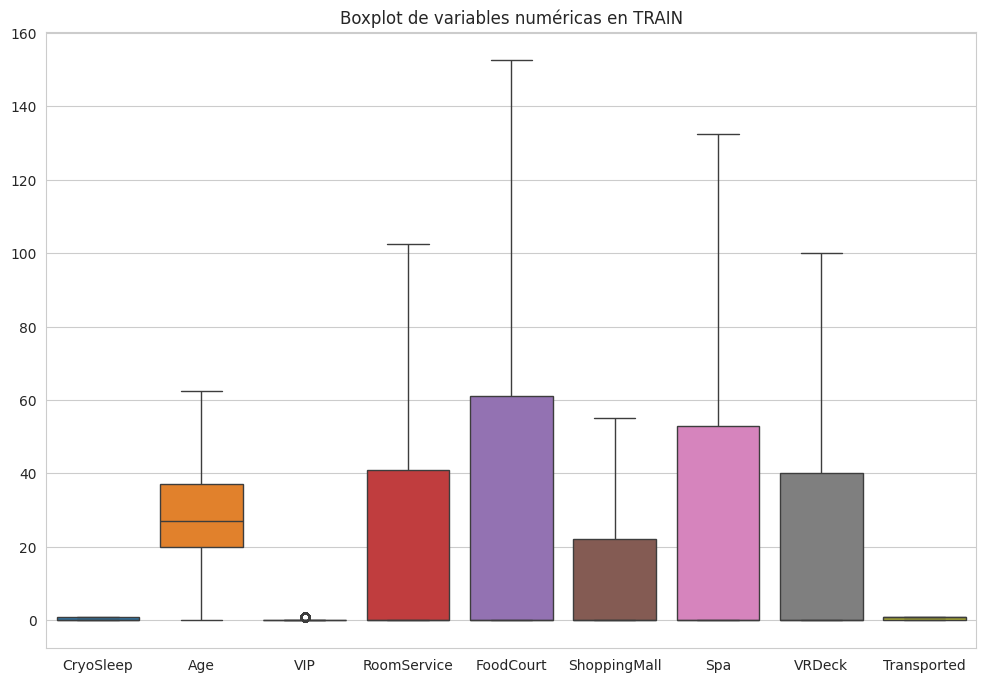

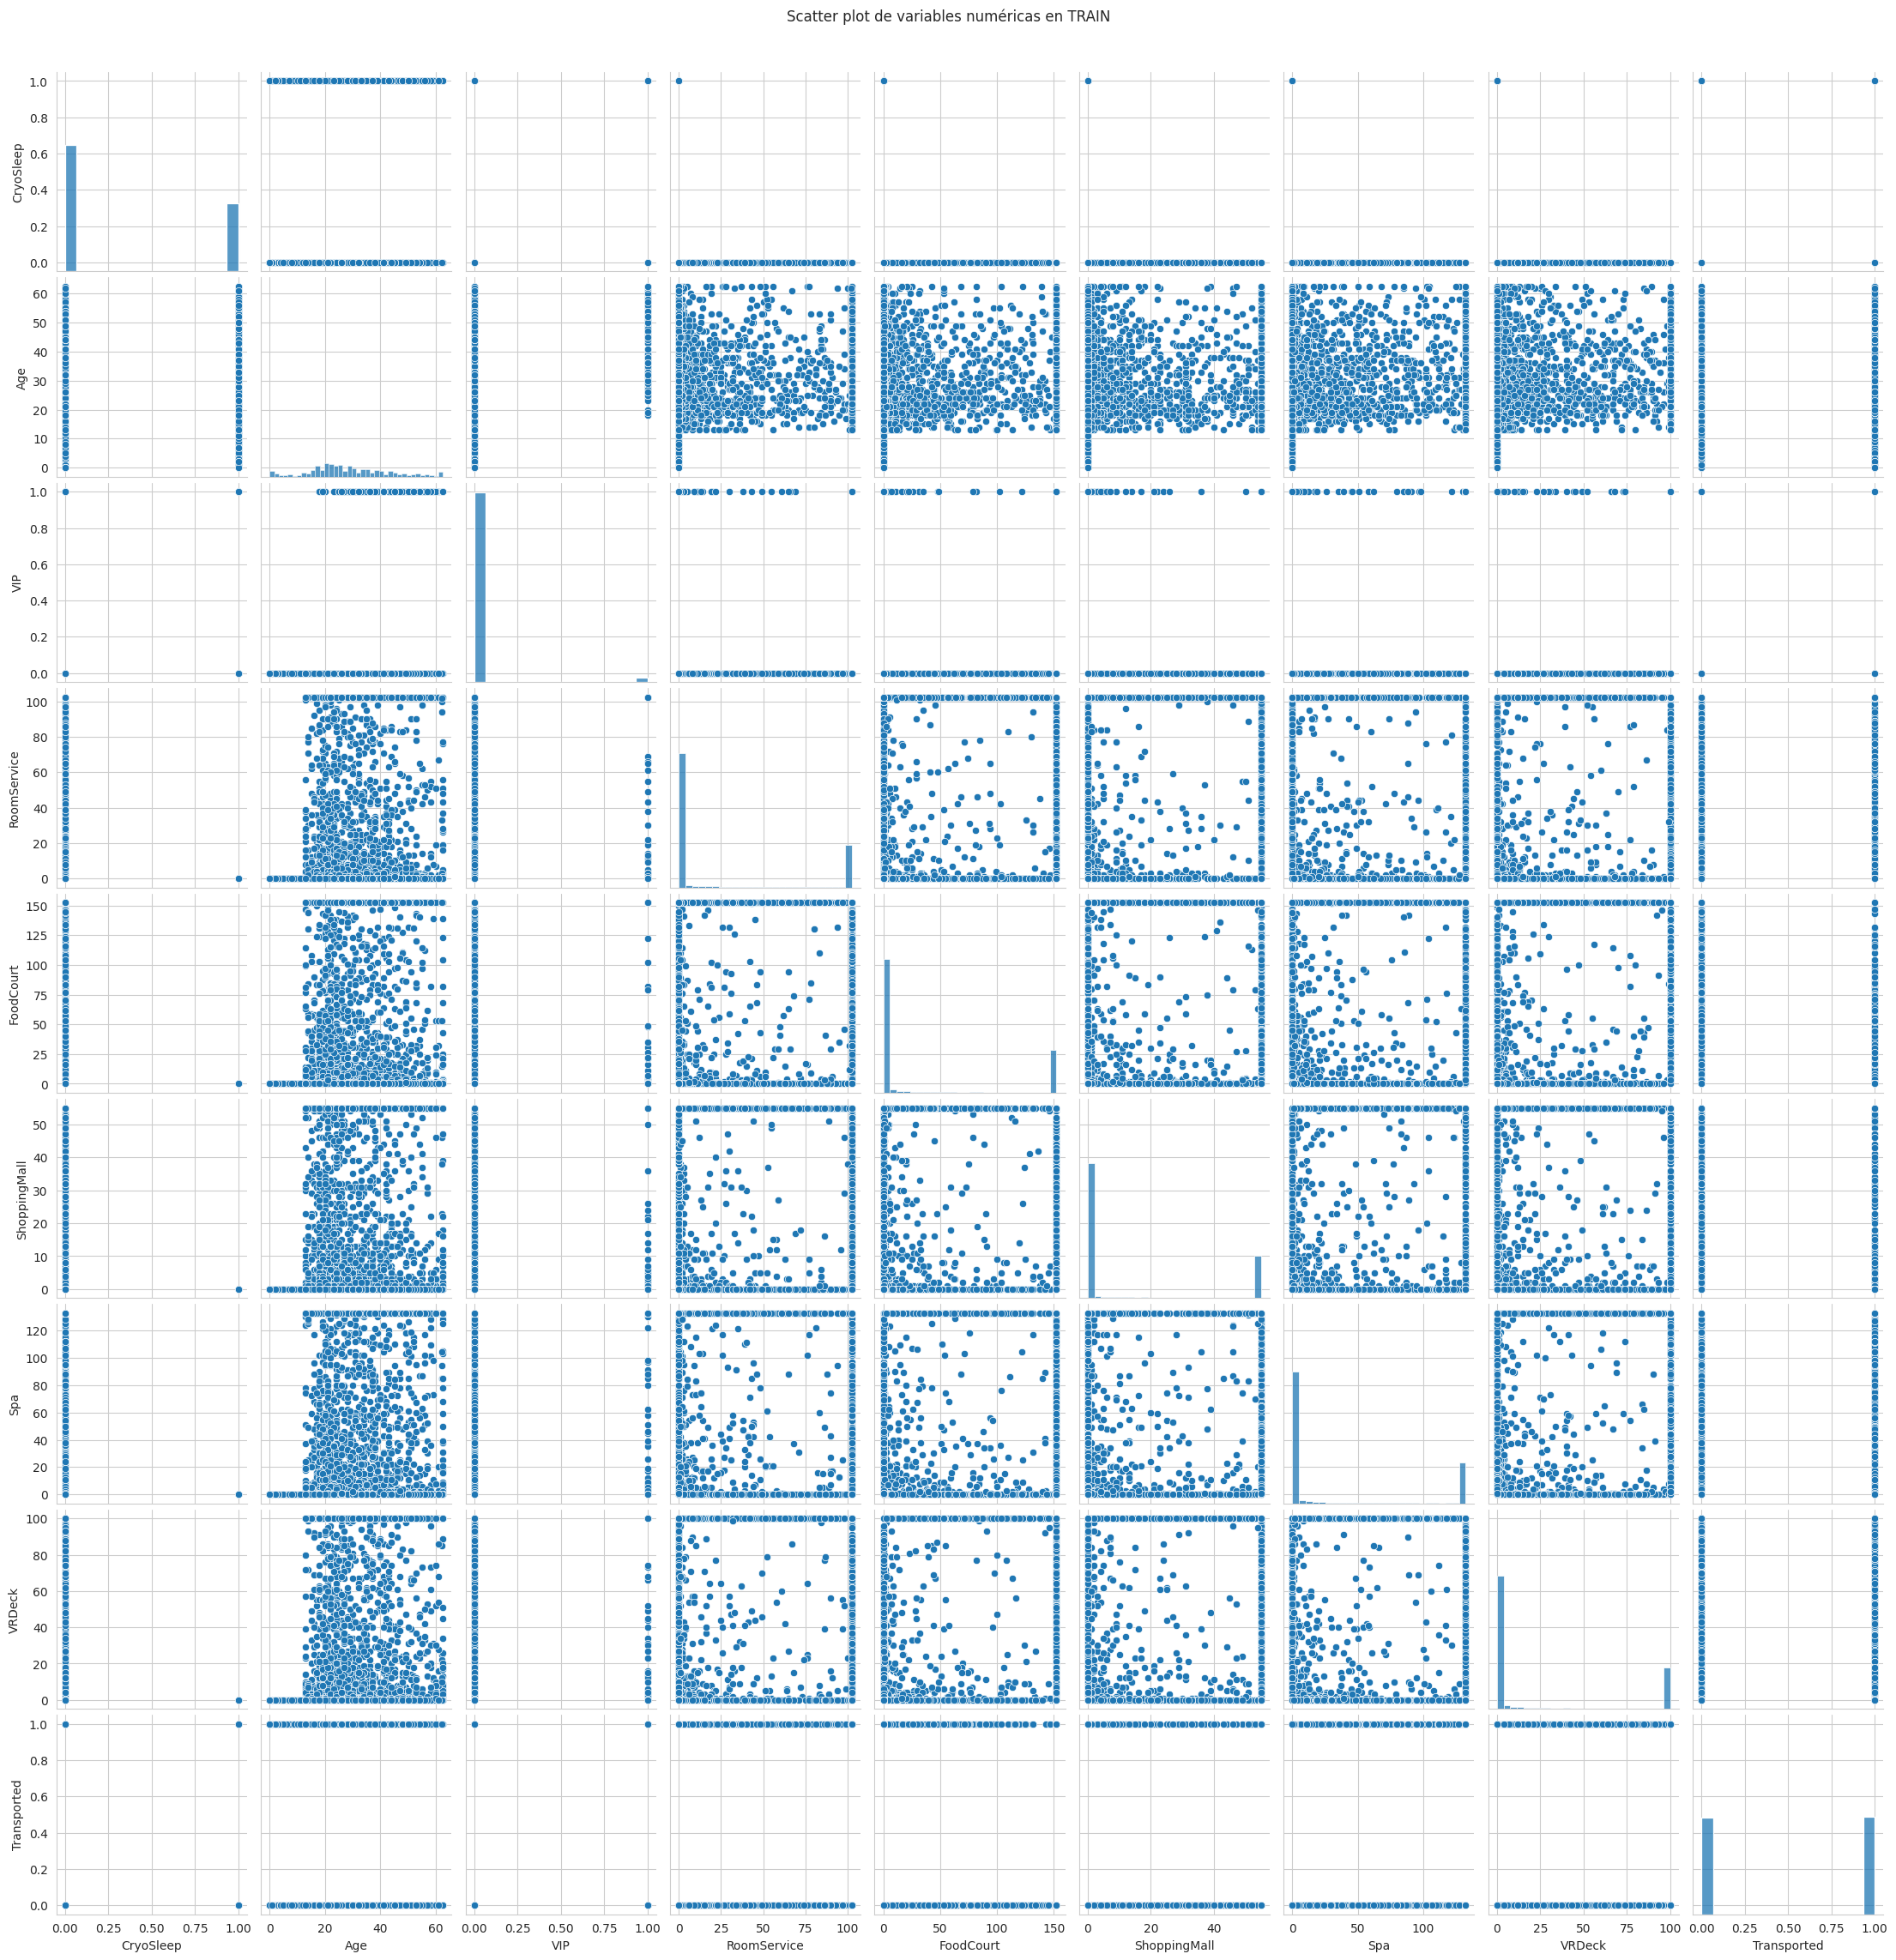

In [ ]:
#Ahora lo volvemos a visualizar para ver como nos ha quedado
#Boxplot de variables numéricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_imputados)
plt.title('Boxplot de variables numéricas en TRAIN')
plt.show()

#Scatter plot de variables numéricas
sns.pairplot(train_imputados)
plt.suptitle('Scatter plot de variables numéricas en TRAIN', y=1.02)
plt.show()

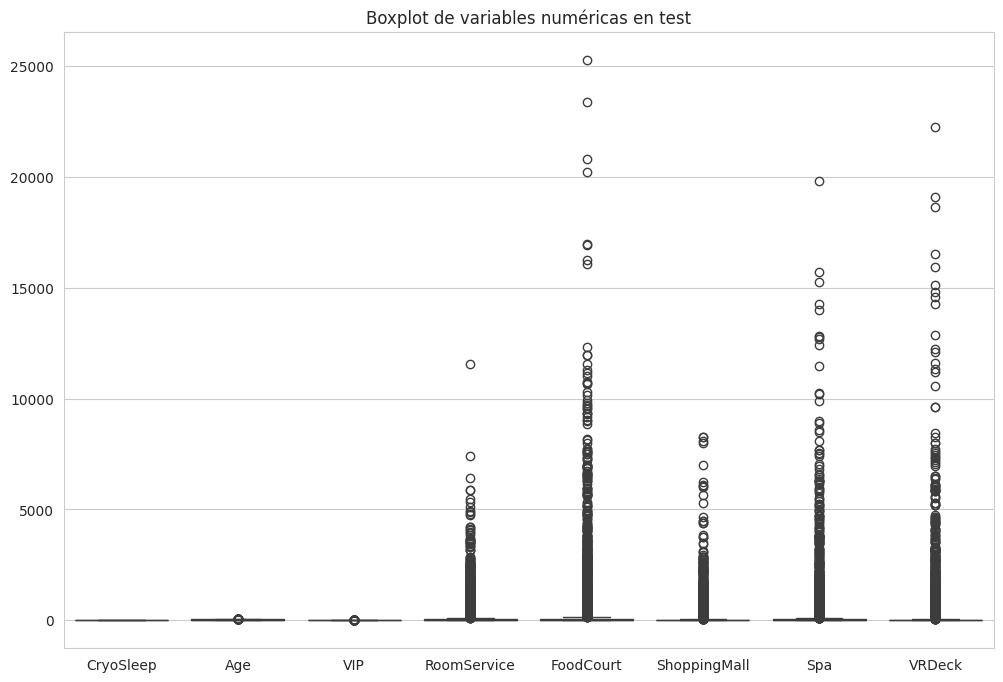

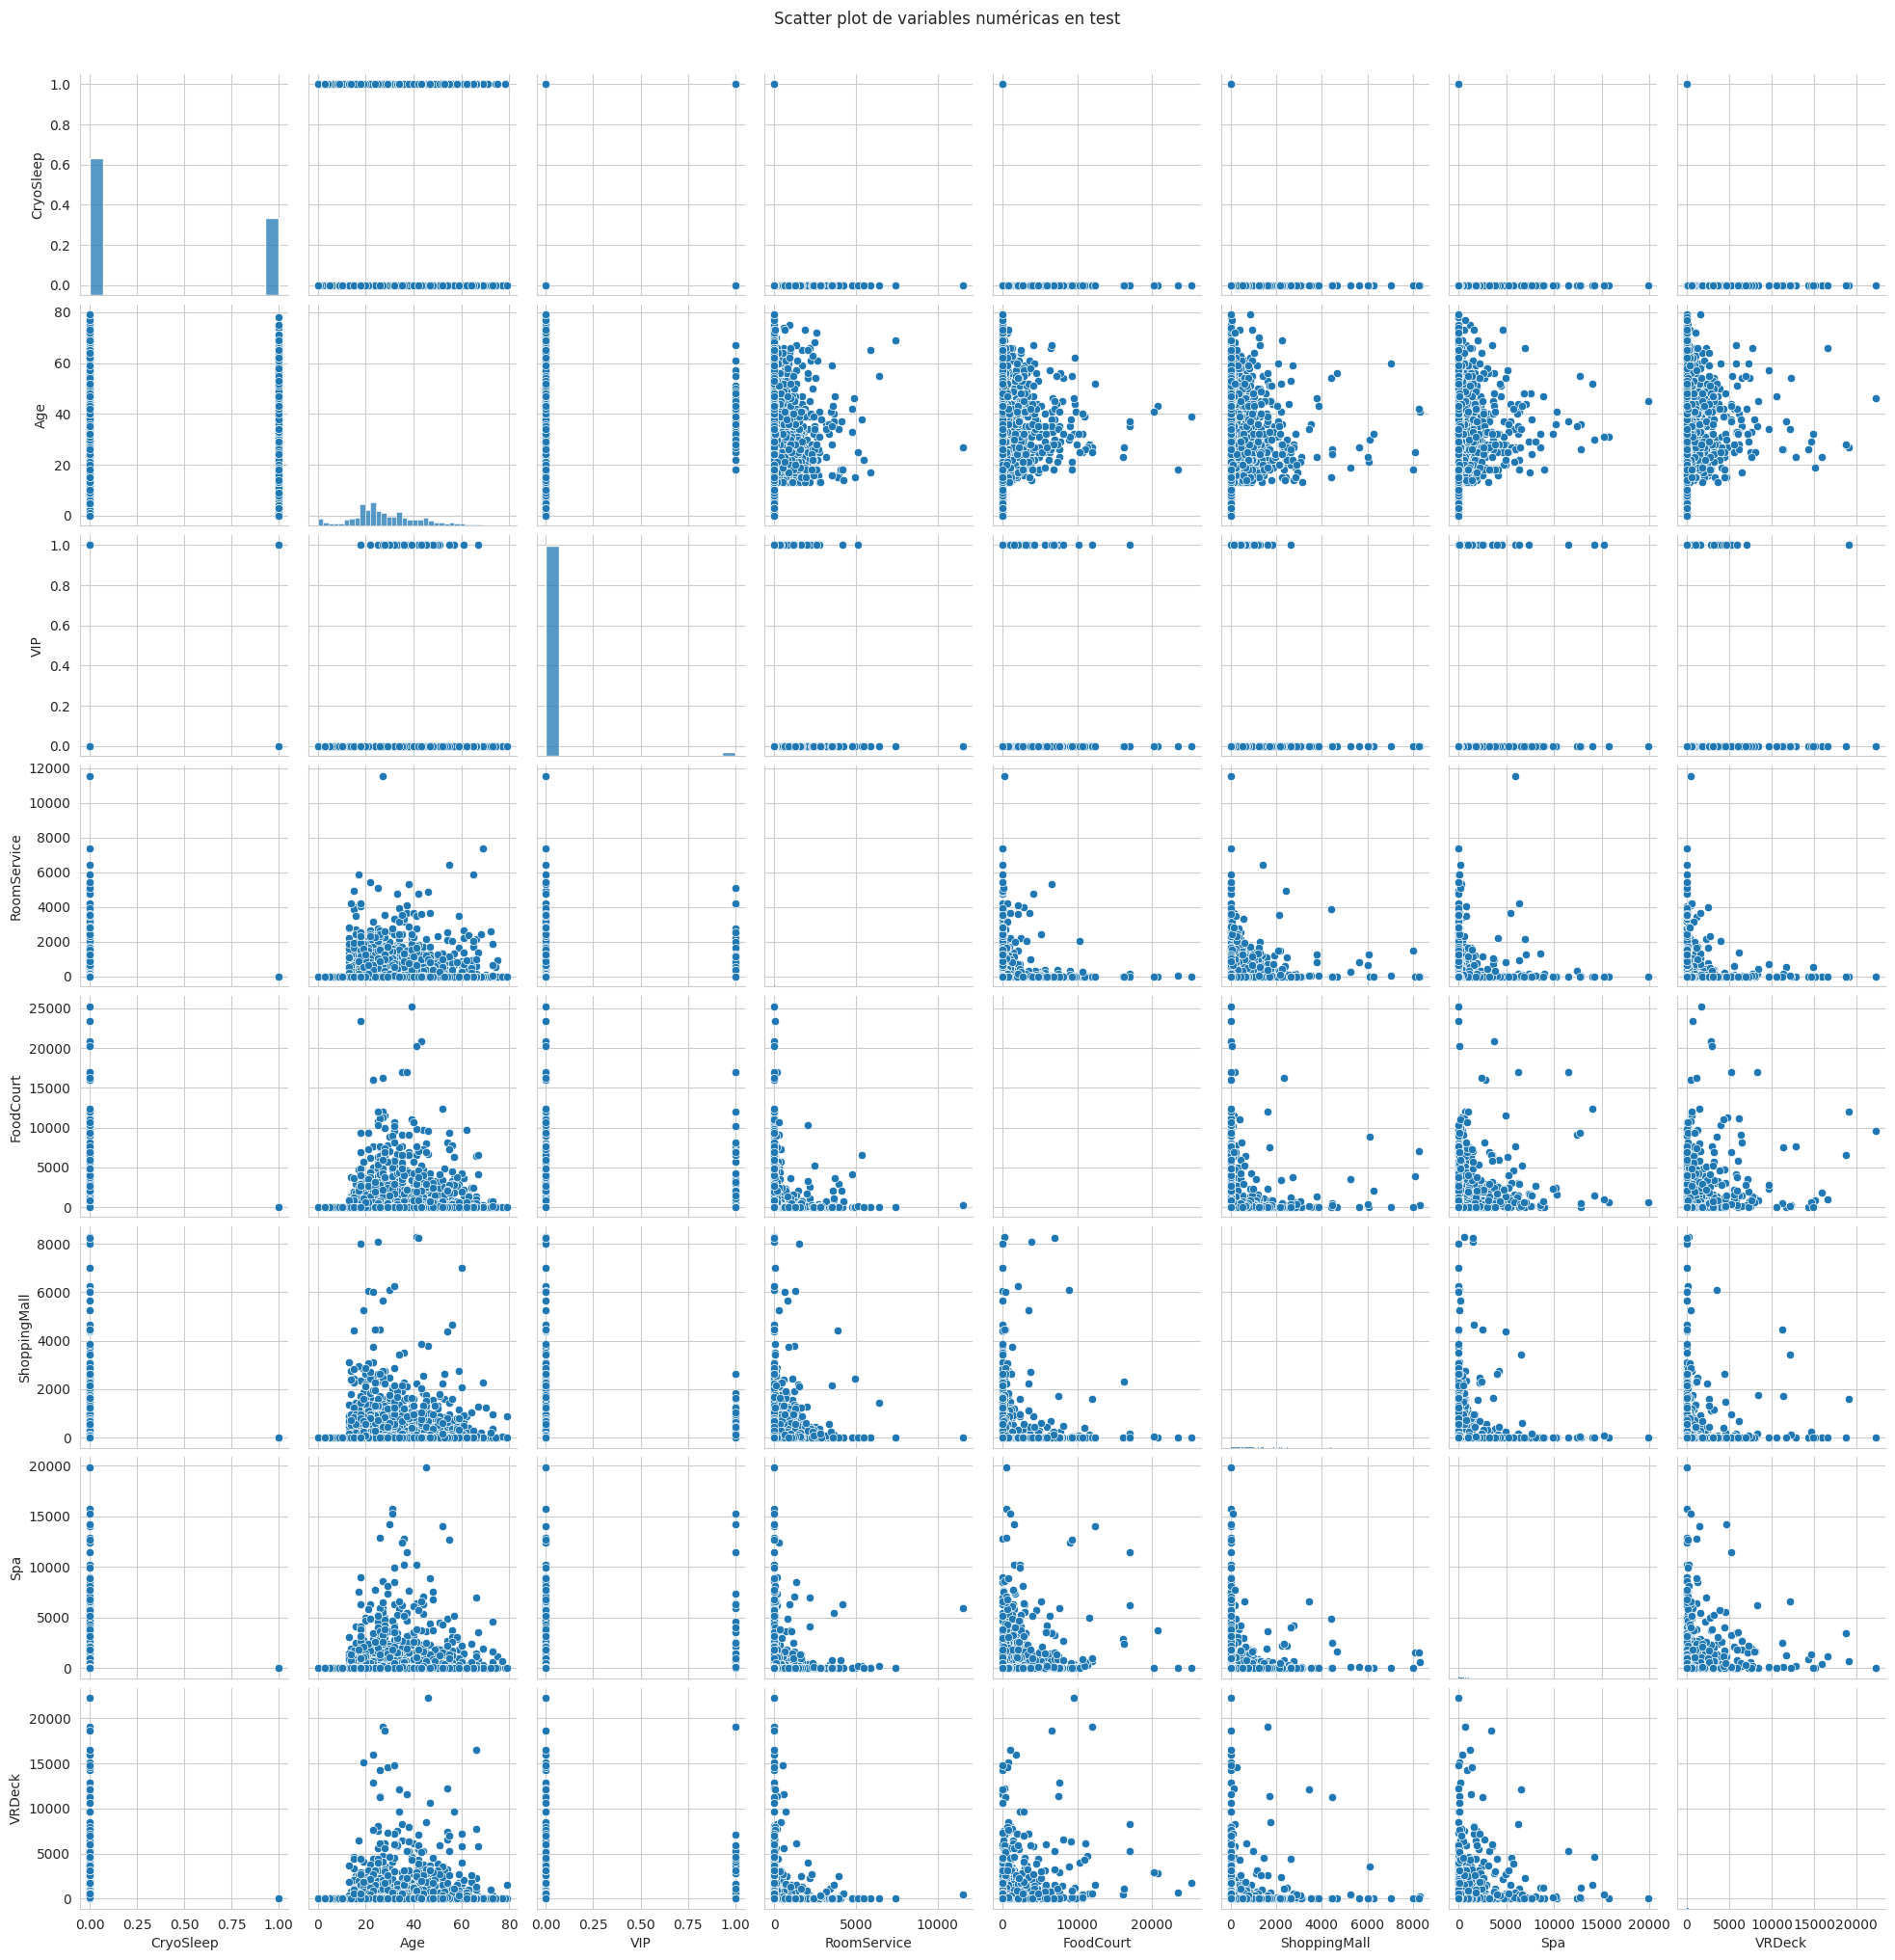

In [ ]:
#Ahora tenemos que hacer lo mismo con TEST
#Vamos a visualizarlo en test

#Boxplot de variables numéricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=test)
plt.title('Boxplot de variables numéricas en test')
plt.show()

#Scatter plot de variables numéricas
sns.pairplot(test)
plt.suptitle('Scatter plot de variables numéricas en test', y=1.02)
plt.show()

In [ ]:
#Tratamos en TEST
import numpy as np
#Función para detectar outliers usando el método IQR
def detectar_outliers_iqr(test):
    outliers_test = {}
    for column in test.select_dtypes(include=[np.number]).columns:
        Q1 = test[column].quantile(0.25)
        Q3 = test[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_test[column] = test[(test[column] < lower_bound) | (test[column] > upper_bound)][column]
    return outliers_test

#Detectar outliers
outliers_test = detectar_outliers_iqr(test)
print("Outliers detectados en Test:")
print(outliers_test)

Outliers detectados en Test:
{'Age': 24      66.0
174     70.0
260     65.0
305     79.0
358     74.0
392     67.0
404     69.0
471     66.0
515     72.0
542     75.0
575     65.0
579     67.0
718     73.0
730     73.0
740     71.0
792     69.0
1008    70.0
1102    67.0
1114    75.0
1139    78.0
1180    71.0
1191    66.0
1314    69.0
1444    65.0
1445    73.0
1458    65.0
1562    67.0
1586    77.0
1706    69.0
1777    65.0
1816    66.0
1819    72.0
1832    68.0
1956    69.0
2051    73.0
2150    68.0
2220    74.0
2228    66.0
2237    67.0
2437    79.0
2538    65.0
2723    66.0
2741    69.0
2791    66.0
2890    66.0
2939    65.0
3084    66.0
3167    72.0
3366    65.0
3951    66.0
4022    65.0
4061    65.0
4138    73.0
4178    65.0
Name: Age, dtype: float64, 'RoomService': 10       339.0
11       932.0
25      1784.0
26       293.0
31       598.0
         ...  
4250     640.0
4252     652.0
4257     882.0
4263    1272.0
4264     147.0
Name: RoomService, Length: 919, dtype: float64, 'FoodC

In [ ]:
#Función para eliminar outliers usando el método IQR
def eliminar_outliers_iqr(test):
    for column in test.select_dtypes(include=[np.number]).columns:
        Q1 = test[column].quantile(0.25)
        Q3 = test[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        test = test[(test[column] >= lower_bound) & (test[column] <= upper_bound)]
    return test

#Eliminar outliers
test_sin_outliers = eliminar_outliers_iqr(test)
print("\nDataFrame de Test después de eliminar outliers:")
print(test_sin_outliers)


DataFrame de Test después de eliminar outliers:
     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth       True     G/3/S    TRAPPIST-1e  27.0  False   
2        0019_01     Europa       True     C/0/S    55 Cancri e  31.0  False   
6        0029_01     Europa       True     B/2/P    55 Cancri e  21.0  False   
7        0032_01     Europa       True     D/0/S    TRAPPIST-1e  20.0  False   
8        0032_02     Europa       True     D/0/S    55 Cancri e  23.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
4267     9260_01      Earth       True  G/1503/P    55 Cancri e   3.0  False   
4269     9263_01      Earth       True  G/1495/S    TRAPPIST-1e  43.0  False   
4272     9266_02      Earth       True  G/1496/S    TRAPPIST-1e  34.0  False   
4274     9271_01       Mars       True   D/296/P    55 Cancri e  18.0  False   
4276     9277_01      Earth       True  G/1498/S  PSO J318.5-22  43.0  

In [ ]:
#Función para imputar outliers usando el método IQR
def imputar_outliers_iqr(test):
    for column in test.select_dtypes(include=[np.number]).columns:
        Q1 = test[column].quantile(0.25)
        Q3 = test[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        test[column] = np.where(test[column] < lower_bound, lower_bound, test[column])
        test[column] = np.where(test[column] > upper_bound, upper_bound, test[column])
    return test

#Imputar outliers
test_imputados = imputar_outliers_iqr(test)
print("\nDataFrame de Test después de imputar outliers:")
print(test_imputados)


DataFrame de Test después de imputar outliers:
     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth       True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth      False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa       True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa      False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth      False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
4272     9266_02      Earth       True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth      False   G/160/P    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars       True   D/296/P    55 Cancri e  18.0  False   
4275     9273_01     Europa      False   D/297/P    TRAPPIST-1e  18.0  False   
4276     9277_01      Earth       True  G/1498/S  PSO J318.5-22  43.0  F

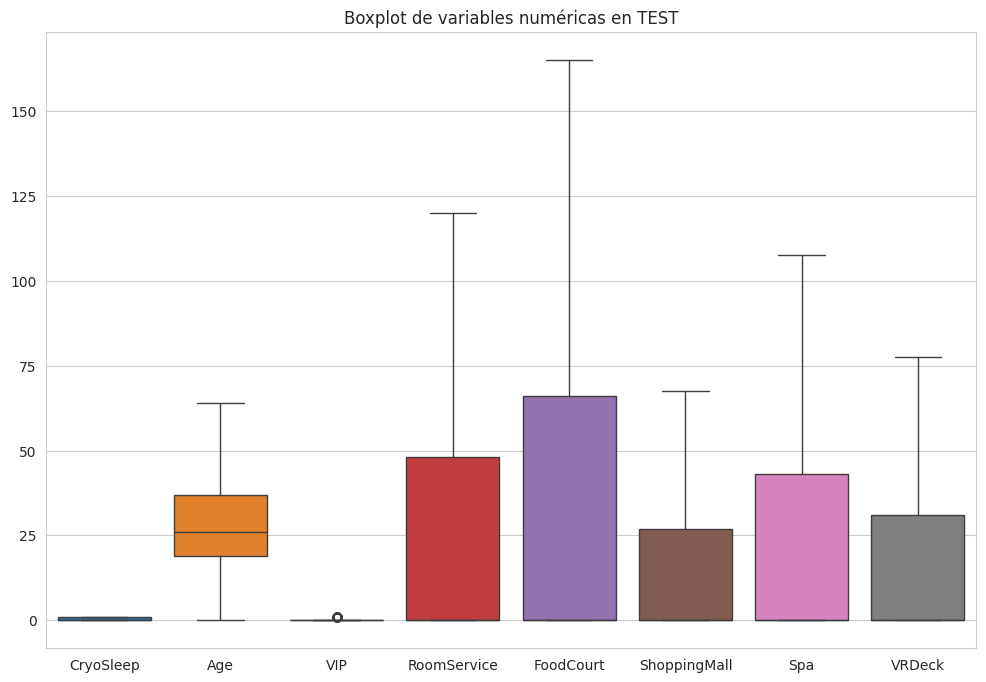

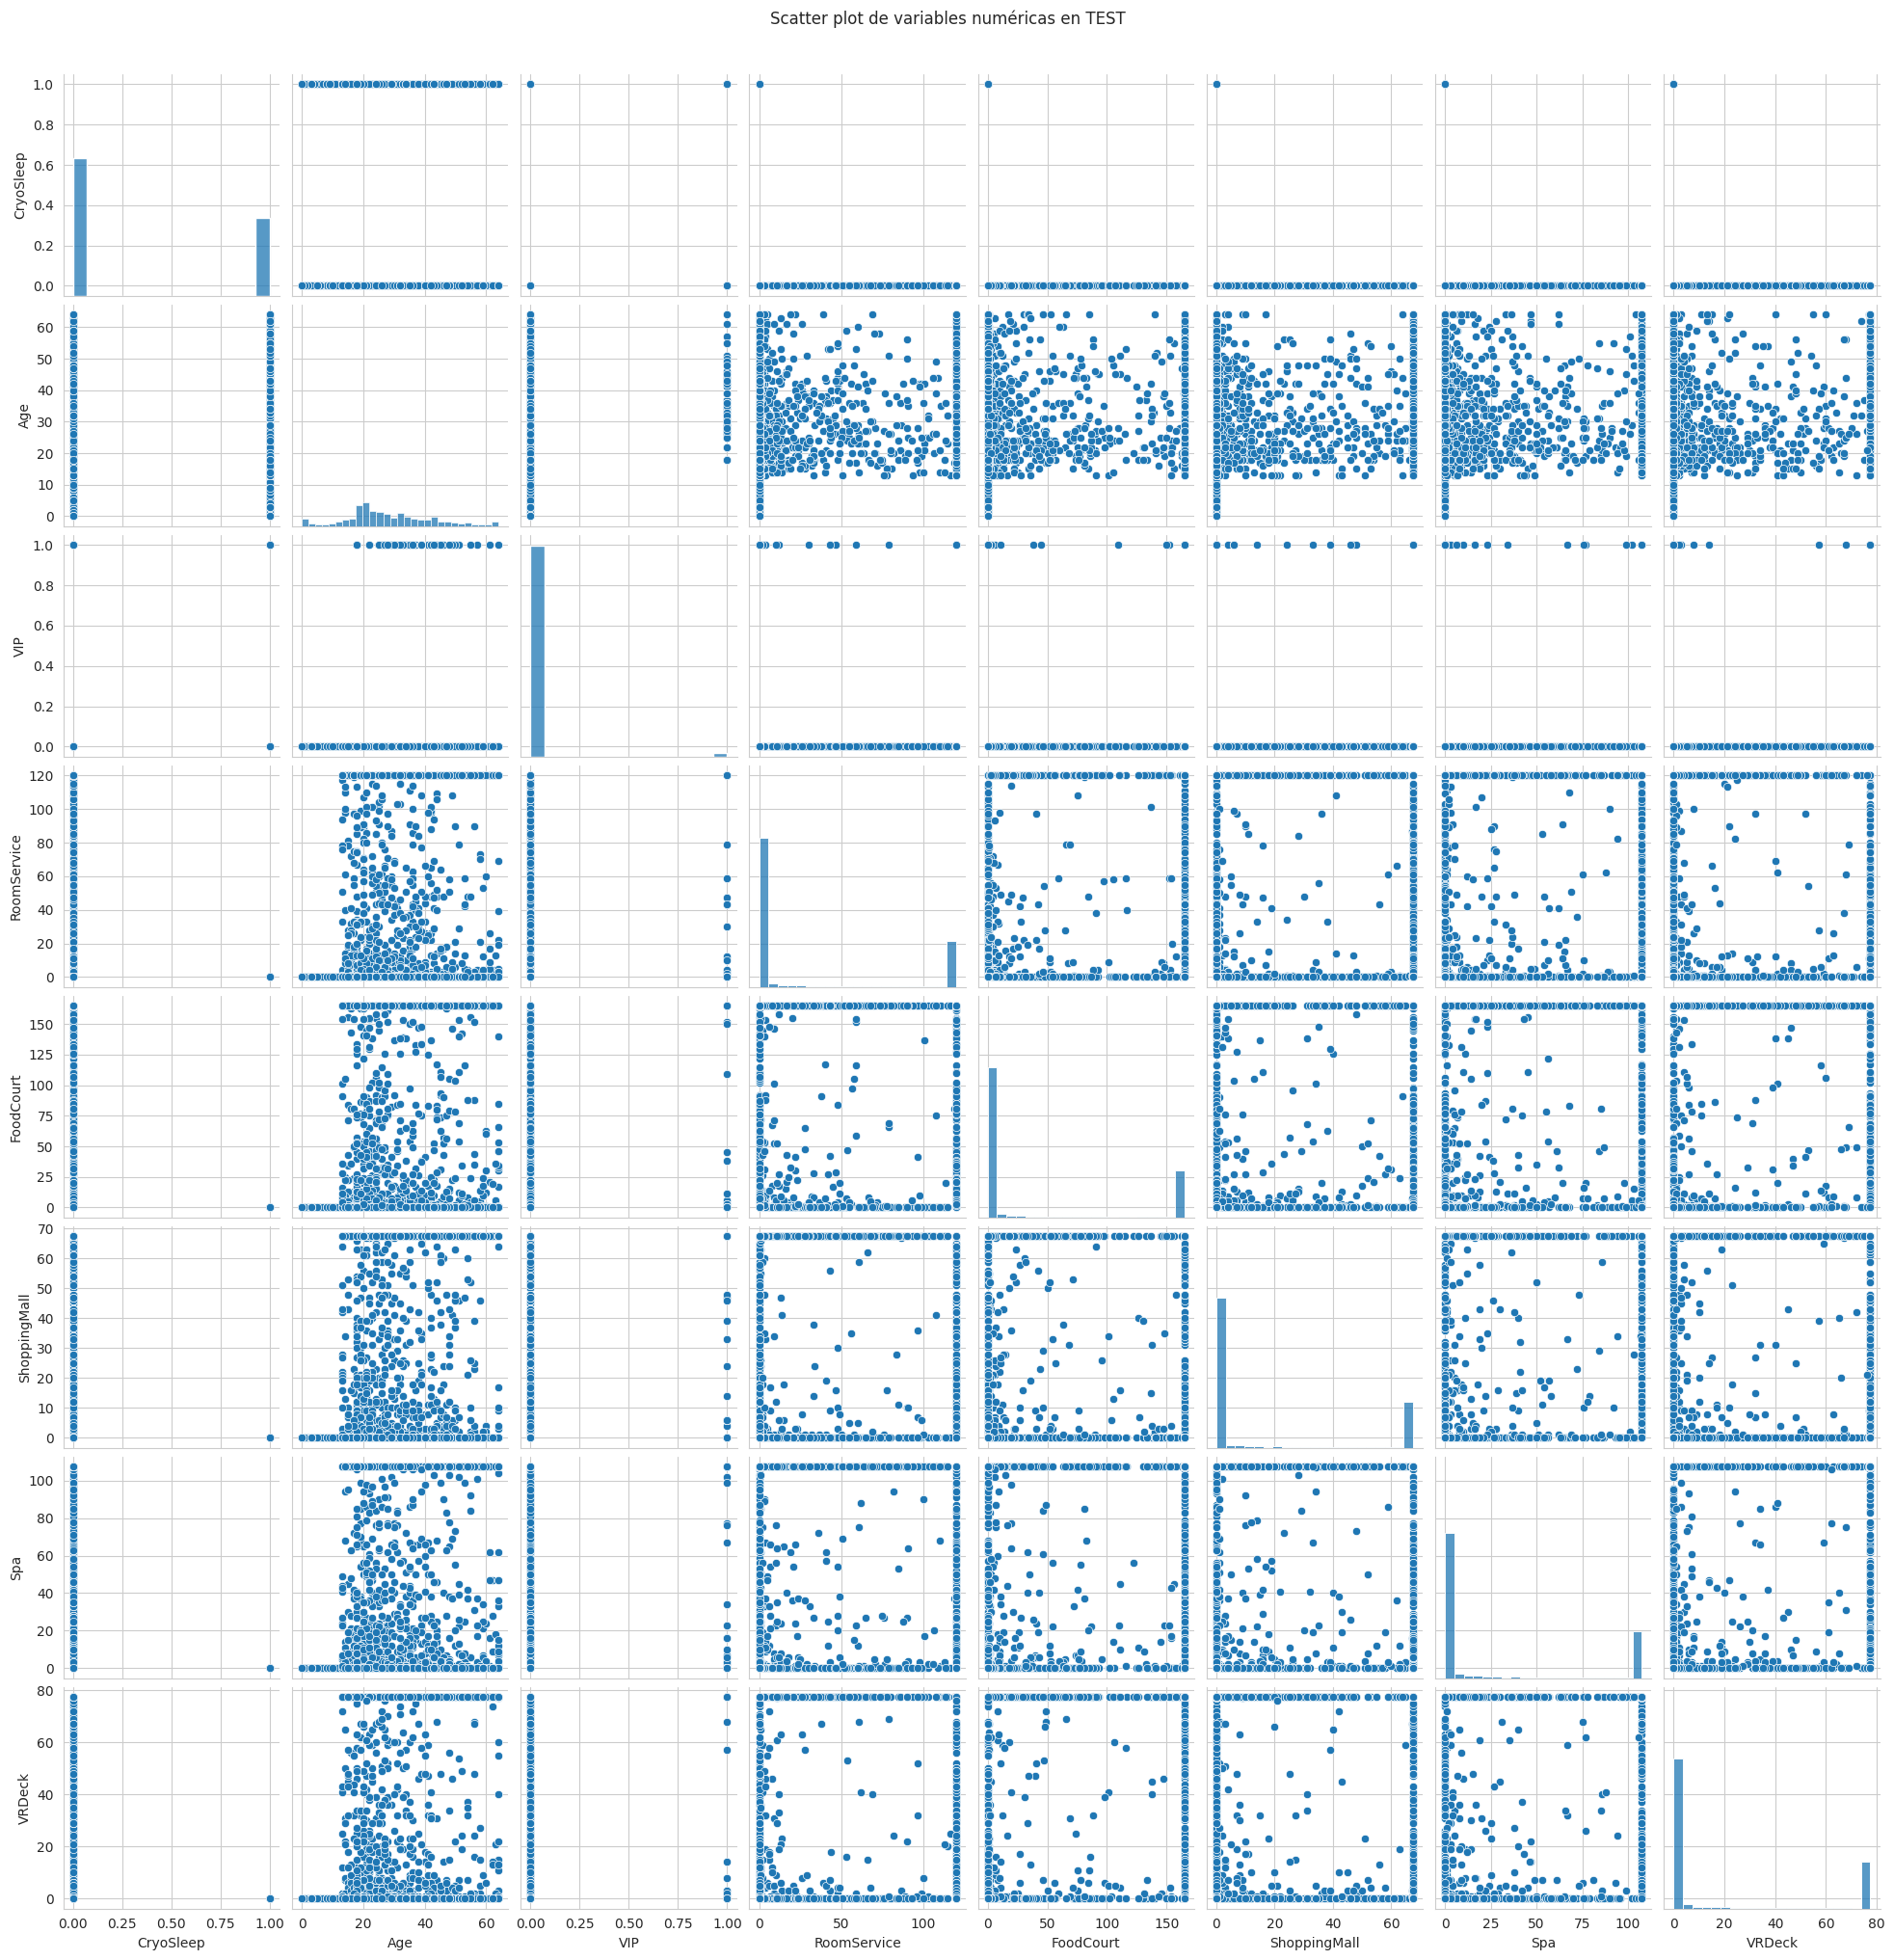

In [ ]:
#Ahora lo volvemos a visualizar para ver como nos ha quedado
#Boxplot de variables numéricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=test_imputados)
plt.title('Boxplot de variables numéricas en TEST')
plt.show()

#Scatter plot de variables numéricas
sns.pairplot(test_imputados)
plt.suptitle('Scatter plot de variables numéricas en TEST', y=1.02)
plt.show()

c) Utilizar técnicas para detectar las variables más importante con respecto a la variable objetivo (Transported)

In [ ]:
#Previamente tendremos que transformar nuestras variables categoricas a numericas

In [ ]:
#Primero lo hacemos en train
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

encoder = LabelEncoder()
#Identificar variables categóricas y numéricas
categorical_features = train_imputados.select_dtypes(include=['object', 'bool']).columns

for feature in categorical_features:
  train_imputados[feature] = encoder.fit_transform(train_imputados[feature])

In [ ]:
train_imputados.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0            0           1          0    149            2  39.0    0   
1            1           0          0   2184            2  24.0    0   
2            2           1          0      1            2  58.0    1   
3            3           1          0      1            2  33.0    0   
4            4           0          0   2186            2  16.0    0   

   RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  Name  Transported  
0          0.0        0.0           0.0    0.0     0.0  5252            0  
1        102.5        9.0          25.0  132.5    44.0  4502            1  
2         43.0      152.5           0.0  132.5    49.0   457            0  
3          0.0      152.5          55.0  132.5   100.0  7149            0  
4        102.5       70.0          55.0  132.5     2.0  8319            1

In [ ]:
#Tenemos que hacerlo tambien en test

encoder = LabelEncoder()
#Identificar variables categóricas y numéricas
categorical_features = test_imputados.select_dtypes(include=['object', 'bool']).columns

for feature in categorical_features:
  test_imputados[feature] = encoder.fit_transform(test_imputados[feature])

In [ ]:
test_imputados.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0            0           0          1   2784            2  27.0    0   
1            1           0          0   1867            2  19.0    0   
2            2           1          1    257            0  31.0    0   
3            3           1          0    259            2  38.0    0   
4            4           0          0   1940            2  20.0    0   

   RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  Name  
0          0.0        0.0           0.0    0.0     0.0  2912  
1          0.0        9.0           0.0  107.5     0.0  2406  
2          0.0        0.0           0.0    0.0     0.0  3376  
3          0.0      165.0           0.0  107.5    77.5  2711  
4         10.0        0.0          67.5    0.0     0.0   668

In [ ]:
#Analisis de correlacion, observa las correlaciones de las variables con "Transported" para identificar las más relevantes.

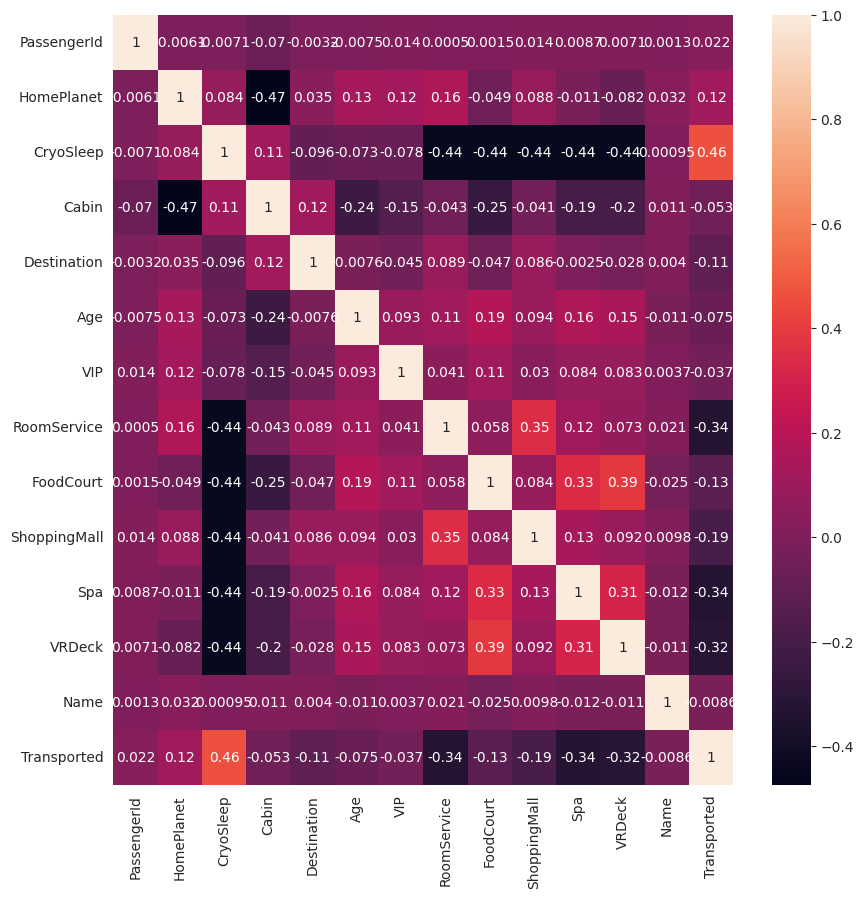

In [ ]:
#Calcula la matriz de correlación
correlation_matrix = train.corr()

#Visualiza la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
#Vamos a hacer un RFE con logistic regression para ver cuales son las cuatro variables mas importantes respecto a nuestra target

In [ ]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

#Tenemos que definir X e y
X = train.drop('Transported', axis=1)
y = train['Transported']

#Crear un modelo de en este caso LogisticRegression
model=LogisticRegression(solver="liblinear")

#Aplicar RFE
rfe=RFE(estimator=model, n_features_to_select=4)
fit=rfe.fit(X, y)

print("Num Features: "     +str(fit.n_features_))
print("Selected Features: "+str(fit.support_   ))
print("Feature Ranking: "  +str(fit.ranking_   ))

X_filtered=fit.transform(X)
print(X_filtered)

Num Features: 4
Selected Features: [False  True  True False  True False  True False False False False False
 False]
Feature Ranking: [ 9  1  1  8  1  7  1  2  5  6  4  3 10]
[[1. 0. 2. 0.]
 [0. 0. 2. 0.]
 [1. 0. 2. 1.]
 ...
 [0. 0. 2. 0.]
 [1. 0. 0. 0.]
 [1. 0. 2. 0.]]


In [ ]:
#Aqui podemos ver que nuestras variables MAS importantes son: HomePlanet, CryoSleep, Destination y VIP, seguidas de RoomService y de VRDeck,
#Las cuatro MENOS importantes son: Name, PassengerId, Cabin, Age y ShoppingMall

#Podemos hacer mas pruebas para ver el nivel de correlacion mediante Kendall/Spearman y Chi-cuadrado

In [ ]:
#Creo que la mejor en este caso es la correlacion de Kendall/Spearman si la variable de salida es continua (Valores numéricos en un rango continuo con infinitas posibilidades)
#Si la variable de salida es ordinal(Categorías discretas con un orden específico.), seria conveniente Chi cuadrado, ya que nuestra variable de entrada(target) es ordinal

#Podemos separar nuestras variables de salida continuas para aplicarles Kendall/Spearman: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck,
#Y separar las variables de salida ordinales para aplicarles Chi-cuadrado: PassengerId, HomePlanet, CryoSleep, Cabin, Destination, VIP, Name

In [ ]:
from scipy.stats import kendalltau

#Calcular la correlación de Kendall
corr, _ = kendalltau(train['Age'], train['Transported'])
print(f'Correlación de Kendall: {corr}')

#Vemos que la variable Age no tiene la correlacion que podia parecer en un inicio que podia tener con nuestra target

Correlación de Kendall: -0.057683938859262


In [ ]:
from scipy.stats import kendalltau

#Calcular la correlación de Kendall
corr, _ = kendalltau(train['RoomService'], train['Transported'])
print(f'Correlación de Kendall: {corr}')
#Vemos que igual que hemos visto en el RFE la variable RoomService si tiene una correlacion negativa moderada,
#lo que significa que a medida que aumenta el RoomService, la probabilidad de ser transportados es menor, esta conclusion ya la hemos sacado mas arriba en nuestras visualizaciones

Correlación de Kendall: -0.34105295640598937


In [ ]:
#Calcular la correlación de Kendall
corr, _ = kendalltau(train['VRDeck'], train['Transported'])
print(f'Correlación de Kendall: {corr}')
#Aqui vemos algo muy parecido a RoomService, como ya hemos visto eran las dos que tenian mas correlacion despues de las cuatro variables con mas correlacion seleccionadas

Correlación de Kendall: -0.3238111072328639


In [ ]:
#Selección de Variables con Chi-Cuadrado: Este método te ayuda a identificar las variables categóricas más relevantes.

In [ ]:
from sklearn.feature_selection import chi2

#Selecciona las variables categóricas
categorical_features = ['PassengerId','HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

#Calcula el estadístico chi-cuadrado y el p-valor
chi2_scores, p_values = chi2(train[categorical_features], train['Transported'])

#Imprime los resultados
for feature, score, p_value in zip(categorical_features, chi2_scores, p_values):
    print(f"Feature: {feature}, Chi-squared score: {score}, p-value: {p_value}")

Feature: PassengerId, Chi-squared score: 5972.725717305515, p-value: 0.0
Feature: HomePlanet, Chi-squared score: 112.75164245741126, p-value: 2.4456857758042355e-26
Feature: CryoSleep, Chi-squared score: 1197.498425827001, p-value: 2.132855629590385e-262
Feature: Cabin, Chi-squared score: 30429.18127381506, p-value: 0.0
Feature: Destination, Chi-squared score: 45.18885801553078, p-value: 1.789201312183616e-11
Feature: VIP, Chi-squared score: 11.792811562479947, p-value: 0.0005945986747351727
Feature: Name, Chi-squared score: 956.7709998084596, p-value: 4.476107334404471e-210


In [ ]:
#Explicacion:
#1. PassengerId en este caso sabemos que es un identificador del pasagero por lo cual no tiene que tener una verdadera asociacion con la variable

#2. HomePlanet:
#Chi-squared score moderadamente alto: Indica una asociación notable entre "HomePlanet" y la variable objetivo.
#P-value extremadamente bajo: El valor P indica que la asociación es muy significativa, sugiriendo que "HomePlanet" tiene una relación importante con la variable objetivo.

#3 CryoSleep:
#Chi-squared score alto: Sugiere una fuerte asociación entre "CryoSleep" y la variable objetivo.
#P-value extremadamente bajo: La asociación es extremadamente significativa. "CryoSleep" es probablemente una característica importante para predecir la variable objetivo.

#4 Cabin:
#Chi-squared score muy alto: Indica una asociación muy fuerte entre "Cabin" y la variable objetivo.
#P-value de 0.0: La asociación es estadísticamente significativa. Sin embargo, la variable "Cabin" puede tener muchos valores únicos,
#lo que puede inflar el puntaje Chi-cuadrado. Es importante verificar si esta variable tiene un valor predictivo real.

#5 Destination:
#Chi-squared score moderadamente alto: Hay una asociación significativa entre "Destination" y la variable objetivo.
#P-value muy bajo: La asociación es estadísticamente significativa, lo que sugiere que "Destination" es relevante para predecir la variable objetivo.

#6 VIP:
#Chi-squared score bajo a moderado: La asociación entre "VIP" y la variable objetivo es menor en comparación con algunas otras características.
#P-value bajo: Aunque el valor P es menor que 0.05, lo que indica significancia estadística, la asociación es menos fuerte en comparación con otras.

#7 Name:
#En este caso nos pasa lo mismo que con PassengerId

d) Aplicar alguna técnica para determinar qué pasajeros fueron transportados y cuales no.

In [ ]:
#PASOS:

#Utilizamos los modelos de clasificacion y habrá que ver cual funciona mejor para la prediccion
#Eliminamos variables que no aporten informacion y separamos nuestra variable target para la prediccion
#Escalamos los datos tanto de train como de test
#Dividimos nuestro conjunto de entrenamiento
#Definimos los modelos y los entrenamos
#Calculamos el accuracy y lo visualizamos de los distintos modelos
#Predecimos sobre el conjunto de test, calculamos la matriz de confusion y la visualizamos

In [ ]:
#Vamos a eliminar las variables que no nos aporten informacion y generamos el conjunto de variables predictoras
x_train = train.drop(['PassengerId', 'Name', 'Cabin', 'ShoppingMall','Transported' ],axis=1)
y_train = train['Transported']
x_train.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           1          0            2  39.0    0          0.0        0.0   
1           0          0            2  24.0    0        102.5        9.0   
2           1          0            2  58.0    1         43.0      152.5   
3           1          0            2  33.0    0          0.0      152.5   
4           0          0            2  16.0    0        102.5       70.0   

     Spa  VRDeck  
0    0.0     0.0  
1  132.5    44.0  
2  132.5    49.0  
3  132.5   100.0  
4  132.5     2.0

In [ ]:
#Repetimos el proceso con test
x_test = test.drop(['PassengerId', 'Name', 'Cabin', 'ShoppingMall'],axis=1)
#testlabel = test.loc[:, 'Transported'], no tenemos para el conjunto de prueba la target
x_test.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           0          1            2  27.0    0          0.0        0.0   
1           0          0            2  19.0    0          0.0        9.0   
2           1          1            0  31.0    0          0.0        0.0   
3           1          0            2  38.0    0          0.0      165.0   
4           0          0            2  20.0    0         10.0        0.0   

     Spa  VRDeck  
0    0.0     0.0  
1  107.5     0.0  
2    0.0     0.0  
3  107.5    77.5  
4    0.0     0.0

In [ ]:
#Escalar características
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Codificar etiquetas
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [ ]:
from sklearn.model_selection import train_test_split

#Dividimos nuestro conjunto de entrenamiento
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Shape of x_train1:", x_train1.shape)
print("Shape of x_test1:", x_test1.shape)
print("Shape of y_train1:", y_train1.shape)
print("Shape of y_test1:", y_test1.shape)

Shape of x_train1: (6954, 9)
Shape of x_test1: (1739, 9)
Shape of y_train1: (6954,)
Shape of y_test1: (1739,)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Vamos a hacer una funcion que pase por varios modelos de clasificacion para calcular la precision, el accuracy, el recall, y el f1
#Tanto en el entrenamiento como el test y lo vamos a almacenar en una lista

In [ ]:
training_score = []
testing_score = []

In [ ]:
def model_prediction(model):
    #Entrenar el modelo
    model.fit(x_train1, y_train1)

    #Realizar predicciones
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)

    #Asegurarse de que y_train1 y y_test1 sean vectores 1D
    y_train1_flat = y_train1.ravel()
    y_test1_flat = y_test1.ravel()

    #Asegurarse de que las predicciones sean vectores 1D
    x_train_pred1_flat = x_train_pred1.ravel()
    x_test_pred1_flat = x_test_pred1.ravel()

    #Calcular las métricas de evaluación
    a = accuracy_score(y_train1_flat, x_train_pred1_flat) * 100
    b = accuracy_score(y_test1_flat, x_test_pred1_flat) * 100

    #Almacenar las puntuaciones
    training_score.append(a)
    testing_score.append(b)

    #Imprimir las métricas
    print(f"Accuracy Score of {model} model on Training Data is: {a:.2f}%")
    print(f"Accuracy Score of {model} model on Testing Data is: {b:.2f}%")
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is: {precision_score(y_test1_flat, x_test_pred1_flat):.2f}")
    print(f"Recall Score of {model} model is: {recall_score(y_test1_flat, x_test_pred1_flat):.2f}")
    print(f"F1 Score of {model} model is: {f1_score(y_test1_flat, x_test_pred1_flat):.2f}")
    print("\n------------------------------------------------------------------------")

    #Mostrar la matriz de confusión
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1_flat, x_test_pred1_flat)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
    plt.show()

Accuracy Score of LogisticRegression() model on Training Data is: 76.01%
Accuracy Score of LogisticRegression() model on Testing Data is: 75.91%

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.77
Recall Score of LogisticRegression() model is: 0.75
F1 Score of LogisticRegression() model is: 0.76

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


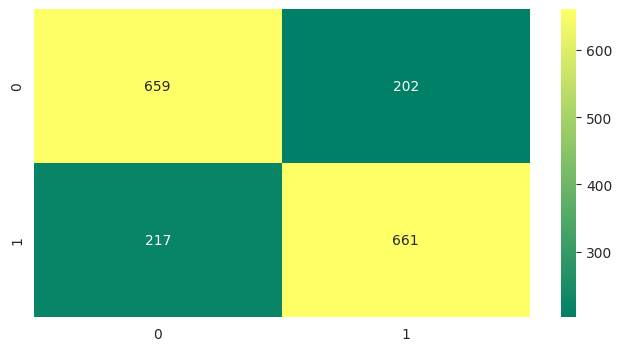

In [ ]:
model_prediction(LogisticRegression())

Accuracy Score of SVC() model on Training Data is: 76.88%
Accuracy Score of SVC() model on Testing Data is: 76.60%

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.75
Recall Score of SVC() model is: 0.81
F1 Score of SVC() model is: 0.78

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


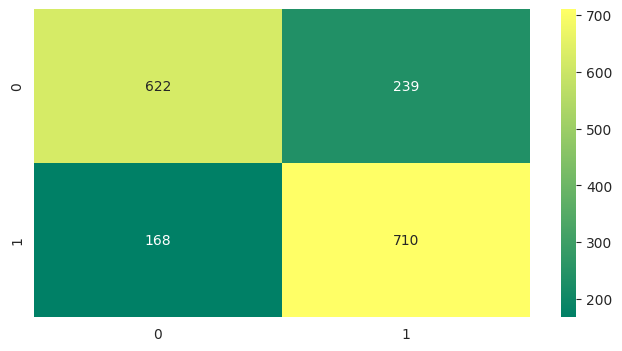

In [ ]:
from sklearn.svm import SVC
model_prediction(SVC())

Accuracy Score of DecisionTreeClassifier() model on Training Data is: 91.34%
Accuracy Score of DecisionTreeClassifier() model on Testing Data is: 70.27%

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.69
Recall Score of DecisionTreeClassifier() model is: 0.76
F1 Score of DecisionTreeClassifier() model is: 0.72

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


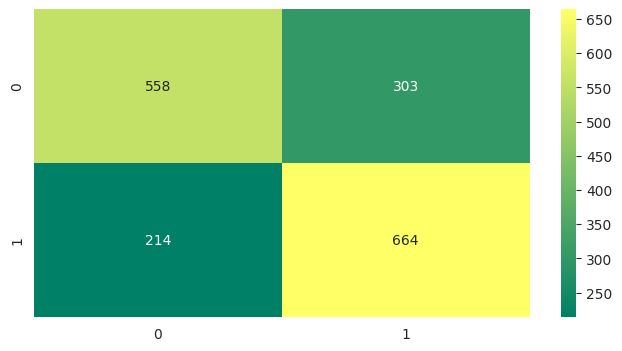

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_prediction(DecisionTreeClassifier())

Accuracy Score of GaussianNB() model on Training Data is: 75.70%
Accuracy Score of GaussianNB() model on Testing Data is: 75.85%

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.76
Recall Score of GaussianNB() model is: 0.77
F1 Score of GaussianNB() model is: 0.76

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


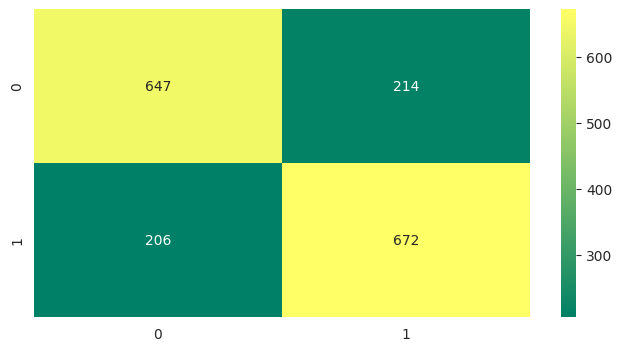

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_prediction(GaussianNB())

Accuracy Score of KNeighborsClassifier() model on Training Data is: 79.94%
Accuracy Score of KNeighborsClassifier() model on Testing Data is: 74.70%

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.75
Recall Score of KNeighborsClassifier() model is: 0.75
F1 Score of KNeighborsClassifier() model is: 0.75

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


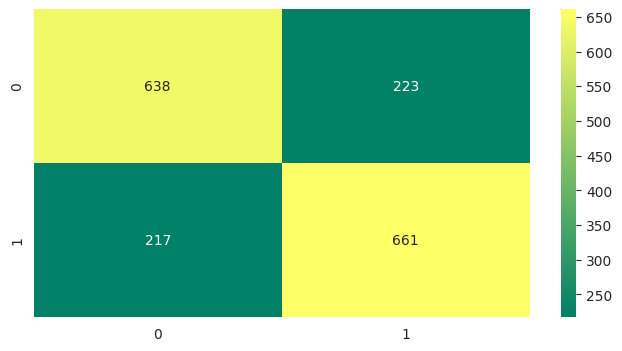

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_prediction(KNeighborsClassifier())

In [ ]:
#Vamos a comparar los modelos creando un dataframe con los datos que hemos sacado y almacenado:
models = ["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree"]

In [ ]:
print(f"Length of models: {len(models)}")
print(f"Length of training_score: {len(training_score)}")
print(f"Length of testing_score: {len(testing_score)}")

Length of models: 5
Length of training_score: 5
Length of testing_score: 5


In [ ]:
df = pd.DataFrame({"Algorithms":models, "Training Score":training_score, "Testing Score":testing_score})

In [ ]:
df

Algorithms  Training Score  Testing Score
0  Logistic Regression       76.013805      75.905693
1                  KNN       76.876618      76.595745
2                  SVM       91.343112      70.270270
3          Naive Bayes       75.697440      75.848189
4        Decision Tree       79.939603      74.698102

In [ ]:
#Con esto podemos comparar el score en train y test de los diferentes algoritmos de clasificacion
#KNN parece ser el modelo más óptimo basado en el equilibrio entre la precisión de entrenamiento y la precisión de prueba.
#Ofrece un buen rendimiento en el conjunto de prueba y no muestra signos evidentes de sobreajuste.
#SVM tiee una alta precision en train pero su precision en test es significativamente mas baja, esto puede ser porque nuestro modelo este sobreajustado

e) Mejorar los resultados optimizando los parámetros.

In [ ]:
#Vamos a hacerlo a traves del GridSearchCV que prueba todas las combinaciones posibles de los parametros especificados
#Vamos a ver que parametros nos recomienda
#Vamos a hacerlo con KNN y LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Definimos el modelo
knn = KNeighborsClassifier()

#Definimos el espacio de parámetros a buscar
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

#Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#Ajustar el modelo
grid_search.fit(x_train1, y_train1)

#Mostrar los mejores parámetros y puntuación
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Best score: 0.7589899094383731


In [ ]:
#Vamos a comprobar los parametros tambien de logisticRegression ya que ha sacado un resultado parecido aunque un poco mas bajo que KNN
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Definir el modelo
model = LogisticRegression()

#Definir el espacio de parámetros a buscar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # 'liblinear' es compatible con 'l1'
    'max_iter': [100, 200, 300]
}

#Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#Ajustar el modelo
grid_search.fit(x_train1, y_train1)

#Mostrar los mejores parámetros y puntuación
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.7599955520845725


f) Comparar los resultados obtenidos utilizando modelos de ensemble para resolver el problema.

In [ ]:
#Vamos a probar modelos ensemble y comparar los resultados
#Vamos a ver varios modelos, random forest, adaboost classifier y gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Crear y entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train1, y_train1)

#Hacer predicciones en el conjunto de prueba
rf_pred = rf.predict(x_test1)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#Crear y entrenar el modelo AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(x_train1, y_train1)

#Hacer predicciones en el conjunto de prueba
ada_pred = ada.predict(x_test1)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Crear y entrenar el modelo Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(x_train1, y_train1)

#Hacer predicciones en el conjunto de prueba
gb_pred = gb.predict(x_test1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Evaluar Random Forest en el conjunto de entrenamiento
rf_train_pred = rf.predict(x_train1)
print("Random Forest - Accuracy:", accuracy_score(y_train1, rf_train_pred))
print("Random Forest - Precision:", precision_score(y_train1, rf_train_pred))
print("Random Forest - Recall:", recall_score(y_train1, rf_train_pred))
print("Random Forest - F1 Score:", f1_score(y_train1, rf_train_pred))

#Evaluar AdaBoost en el conjunto de entrenamiento
ada_train_pred = ada.predict(x_train1)
print("AdaBoost - Accuracy:", accuracy_score(y_train1, ada_train_pred))
print("AdaBoost - Precision:", precision_score(y_train1, ada_train_pred))
print("AdaBoost - Recall:", recall_score(y_train1, ada_train_pred))
print("AdaBoost - F1 Score:", f1_score(y_train1, ada_train_pred))

#Evaluar Gradient Boosting en el conjunto de entrenamiento
gb_train_pred = gb.predict(x_train1)
print("Gradient Boosting - Accuracy:", accuracy_score(y_train1, gb_train_pred))
print("Gradient Boosting - Precision:", precision_score(y_train1, gb_train_pred))
print("Gradient Boosting - Recall:", recall_score(y_train1, gb_train_pred))
print("Gradient Boosting - F1 Score:", f1_score(y_train1, gb_train_pred))

Random Forest - Accuracy: 0.9132873166522865
Random Forest - Precision: 0.8903260576663972
Random Forest - Recall: 0.944
Random Forest - F1 Score: 0.9163777562057966
AdaBoost - Accuracy: 0.7653149266609146
AdaBoost - Precision: 0.7598775737340011
AdaBoost - Recall: 0.7802857142857142
AdaBoost - F1 Score: 0.769946433605864
Gradient Boosting - Accuracy: 0.7831463905665804
Gradient Boosting - Precision: 0.7733260153677278
Gradient Boosting - Recall: 0.8051428571428572
Gradient Boosting - F1 Score: 0.7889137737961925


In [ ]:
#Random Forest es claramente el mejor modelo basado en estas métricas:
#Mayor precisión general (Accuracy)
#Mayor precisión positiva (Precision)
#Mayor recall
#Mayor F1 Score
#Esto sugiere que Random Forest no solo es más preciso en general,
#sino que también es más eficaz en identificar instancias positivas y equilibrar precisión y recall.

g) Seleccionar el mejor modelo de los testeados en los apartados anteriores.

In [ ]:
#Si comparamos todos los resultados de entrenamiento de los modelos, el que mejor resultados saca es el modelo de Ensemble Random Forest
#Entrenamiento y validacion del modelo en el conjunto de datos de entrenamiento

#Creamos una copia del dataset train para trabajar con la copia
train_data = train.copy()

#Separar las características (X) y la variable objetivo (y)
X = train_data.drop(columns=['Name', 'Cabin', 'ShoppingMall','Transported'])
y = train_data['Transported']

#Dividir en conjunto de entrenamiento y conjunto de validación
X_train_split, X_val, y_train_split, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

#Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1 Score: {f1:.4f}")

Validation Accuracy: 0.7504
Validation Precision: 0.7688
Validation Recall: 0.7232
Validation F1 Score: 0.7453


In [ ]:
#Creamos una copia para trabajar sobre la copia del dataset test
test_data = test.copy()

#y no tiene la columna 'target' (es decir, solo características)
X_test = test_data.drop (['Name', 'Cabin', 'ShoppingMall'], axis = 1)

#Realizar predicciones con el modelo entrenado
y_test_pred = model.predict(X_test)

#Crear un DataFrame para las predicciones
#Suponiendo que 'PassengerId' es la columna de identificación en el conjunto de prueba
output = pd.DataFrame({'PassengerId': test_data.index, 'Transported': y_test_pred})

#Guardar las predicciones en un archivo CSV
output.to_csv('submission.csv', index=False)
print("Predicciones guardadas en submission.csv")

Predicciones guardadas en submission.csv


In [ ]:
Predicciones = pd.read_csv('submission.csv')
Predicciones

PassengerId  Transported
0               0            1
1               1            0
2               2            1
3               3            1
4               4            1
...           ...          ...
4272         4272            1
4273         4273            1
4274         4274            1
4275         4275            1
4276         4276            1

[4277 rows x 2 columns]